In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [6]:
# train = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
# test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")
# original = pd.read_csv("/kaggle/input/flood-prediction-factors/flood.csv")
# sub = pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
df_sub = pd.read_csv("sample_submission.csv")
df_original = pd.read_csv("flood.csv")

columns = df_train.columns

In [7]:
df_train.head(5)

id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   ...  DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
0  ...                5                     3           3           5   
1  ...                7                     2           0           3   
2  ...                7                     3           7           5   
3  ...                2                     4           7           4   
4  ...                2                     2           6           6   

   DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                            4                7            5   
1                            5                3            3   
2                            6                8            2   
3                            4                6            5   
4                            4                1            2   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   7                 3             0.445  
1                   4                 3             0.450  
2                   3                 3             0.530  
3                   7                 5             0.535  
4                   3                 5             0.415  

[5 rows x 22 columns]

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

<div style='color: #000; border: 3px solid brown; background-color: lightyellow; padding: 10px'>
<h3>Details about the dataset:</h3>
    <ul>
        <li><b>Monsoon Intensity</b>: Biểu thị cường độ gió mùa được đo bằng lượng mưa, ảnh hưởng đến khả năng xảy ra lũ lụt.</li>
        <li><b>Topography Drainage</b>: Cho biết địa hình có thể thoát nước một cách tự nhiên tốt như thế nào, điều này ảnh hưởng đến nguy cơ lũ lụt.</li>
        <li><b>River Management</b>: Đề cập đến tính hiệu quả và duy trì hệ thống sông có thể giảm thiểu hoặc làm trầm trọng thêm lũ lụt.</li>
        <li><b>Deforestation</b>: Đo lường mức độ mất đi độ che phủ rừng, có thể làm tăng khả năng xảy ra lũ lụt do khả năng hấp thụ nước của đất giảm.</li>
        <li><b>Urbanization</b>: Mô tả mức độ phát triển đô thị thường làm giảm khả năng thấm của đất và tăng nguy cơ lũ lụt.</li>
        <li><b>Climate Change</b>: Xem xét tác động của các yếu tố biến đổi khí hậu như mực nước biển dâng và lượng mưa tăng, ảnh hưởng đến tần suất và mức độ nghiêm trọng của lũ lụt.</li>
        <li><b>Dams Quality</b>: Đánh giá tình trạng và tính toàn vẹn của các con đập, quan trọng đối với việc kiểm soát lũ lụt và quản lý nước.</li>
        <li><b>Siltation</b>:Đề cập đến sự tích tụ trầm tích trong các vùng nước, làm giảm khả năng giữ nước của chúng và do đó làm tăng nguy cơ lũ lụt.</li>
        <li><b>Agricultural Practices</b>: Đánh giá các phương pháp nông nghiệp được sử dụng, có thể tác động đến khả năng xói mòn đất và giữ nước, ảnh hưởng đến lũ lụt.</li>
        <li><b>Encroachments</b>: Đo lường các hoạt động của con người lấn chiếm các đường dẫn nước tự nhiên hoặc vùng đồng bằng ngập lũ, có thể cản trở dòng nước tự nhiên và làm tăng nguy cơ lũ lụt.</li>
        <li><b>Ineffective Disaster Preparedness</b>: Cho biết mức độ chưa sẵn sàng ứng phó với các thảm họa thiên nhiên như lũ lụt, ảnh hưởng đến mức độ nghiêm trọng của hậu quả.</li>
        <li><b>Drainage Systems</b>: Đánh giá hiệu quả và năng lực của hệ thống thoát nước đô thị trong việc xử lý lượng mưa lớn, yếu tố quan trọng trong phòng chống lũ lụt.</li>
        <li><b>Coastal Vulnerability</b>: Đo lường mức độ dễ bị tổn thương của các khu vực ven biển trước lũ lụt, đặc biệt liên quan đến mực nước biển dâng và nước dâng do bão.</li>
        <li><b>Landslides</b>: Đề cập đến khả năng và sự xuất hiện lịch sử của các vụ lở đất, có thể chặn các dòng sông và tạo ra lũ lụt bất ngờ.</li>
        <li><b>Watersheds</b>: Kiểm tra tình trạng và quản lý lưu vực sông, những yếu tố quan trọng để kiểm soát hoặc phân tán lượng nước lớn.</li>
        <li><b>Deteriorating Infrastructure</b>: Đánh giá tình trạng của cơ sở hạ tầng quan trọng như cầu và đường, có thể ảnh hưởng đến sự an toàn và định tuyến nước lũ.</li>
        <li><b>Population Score</b>: Biểu thị mật độ và sự phân bố dân cư vùng lũ lụt, ảnh hưởng đến số lượng người dân bị ảnh hưởng bởi lũ lụt.</li>
        <li><b>Wetland Loss</b>: Đo lường mức độ giảm diện tích đất ngập nước, nơi hấp thụ nước lũ một cách tự nhiên và giảm mức độ nghiêm trọng của lũ lụt.</li>
        <li><b>Inadequate Planning</b>: Đề cập đến việc thiếu quy hoạch đô thị và khu vực để giảm thiểu lũ lụt, ảnh hưởng đến mức độ nghiêm trọng và khả năng phục hồi sau lũ lụt.</li>
        <li><b>Political Factors</b>:Xem xét vai trò của quản trị, chính sách và ý chí chính trị trong việc quản lý và chuẩn bị cho rủi ro lũ lụt.</li>
    </ul>
</div>


## Visualizing

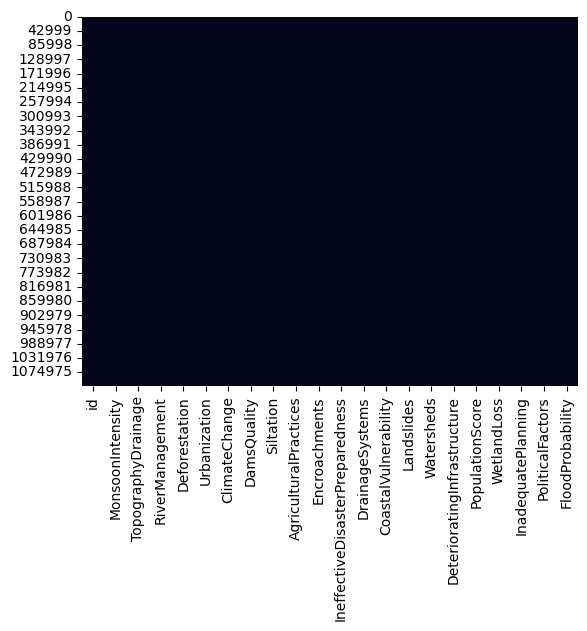

In [69]:
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [15]:
df_train.describe().T

count           mean            std  \
id                               1117957.0  558978.000000  322726.531782   
MonsoonIntensity                 1117957.0       4.921450       2.056387   
TopographyDrainage               1117957.0       4.926671       2.093879   
RiverManagement                  1117957.0       4.955322       2.072186   
Deforestation                    1117957.0       4.942240       2.051689   
Urbanization                     1117957.0       4.942517       2.083391   
ClimateChange                    1117957.0       4.934093       2.057742   
DamsQuality                      1117957.0       4.955878       2.083063   
Siltation                        1117957.0       4.927791       2.065992   
AgriculturalPractices            1117957.0       4.942619       2.068545   
Encroachments                    1117957.0       4.949230       2.083324   
IneffectiveDisasterPreparedness  1117957.0       4.945239       2.078141   
DrainageSystems                  1117957.0       4.946893       2.072333   
CoastalVulnerability             1117957.0       4.953999       2.088899   
Landslides                       1117957.0       4.931376       2.078287   
Watersheds                       1117957.0       4.929032       2.082395   
DeterioratingInfrastructure      1117957.0       4.925907       2.064813   
PopulationScore                  1117957.0       4.927520       2.074176   
WetlandLoss                      1117957.0       4.950859       2.068696   
InadequatePlanning               1117957.0       4.940587       2.081123   
PoliticalFactors                 1117957.0       4.939004       2.090350   
FloodProbability                 1117957.0       0.504480       0.051026   

                                   min        25%         50%        75%  \
id                               0.000  279489.00  558978.000  838467.00   
MonsoonIntensity                 0.000       3.00       5.000       6.00   
TopographyDrainage               0.000       3.00       5.000       6.00   
RiverManagement                  0.000       4.00       5.000       6.00   
Deforestation                    0.000       4.00       5.000       6.00   
Urbanization                     0.000       3.00       5.000       6.00   
ClimateChange                    0.000       3.00       5.000       6.00   
DamsQuality                      0.000       4.00       5.000       6.00   
Siltation                        0.000       3.00       5.000       6.00   
AgriculturalPractices            0.000       3.00       5.000       6.00   
Encroachments                    0.000       4.00       5.000       6.00   
IneffectiveDisasterPreparedness  0.000       3.00       5.000       6.00   
DrainageSystems                  0.000       4.00       5.000       6.00   
CoastalVulnerability             0.000       3.00       5.000       6.00   
Landslides                       0.000       3.00       5.000       6.00   
Watersheds                       0.000       3.00       5.000       6.00   
DeterioratingInfrastructure      0.000       3.00       5.000       6.00   
PopulationScore                  0.000       3.00       5.000       6.00   
WetlandLoss                      0.000       4.00       5.000       6.00   
InadequatePlanning               0.000       3.00       5.000       6.00   
PoliticalFactors                 0.000       3.00       5.000       6.00   
FloodProbability                 0.285       0.47       0.505       0.54   

                                         max  
id                               1117956.000  
MonsoonIntensity                      16.000  
TopographyDrainage                    18.000  
RiverManagement                       16.000  
Deforestation                         17.000  
Urbanization                          17.000  
ClimateChange                         17.000  
DamsQuality                           16.000  
Siltation                             16.000  
AgriculturalPractices                 16.000  
Encroachments         

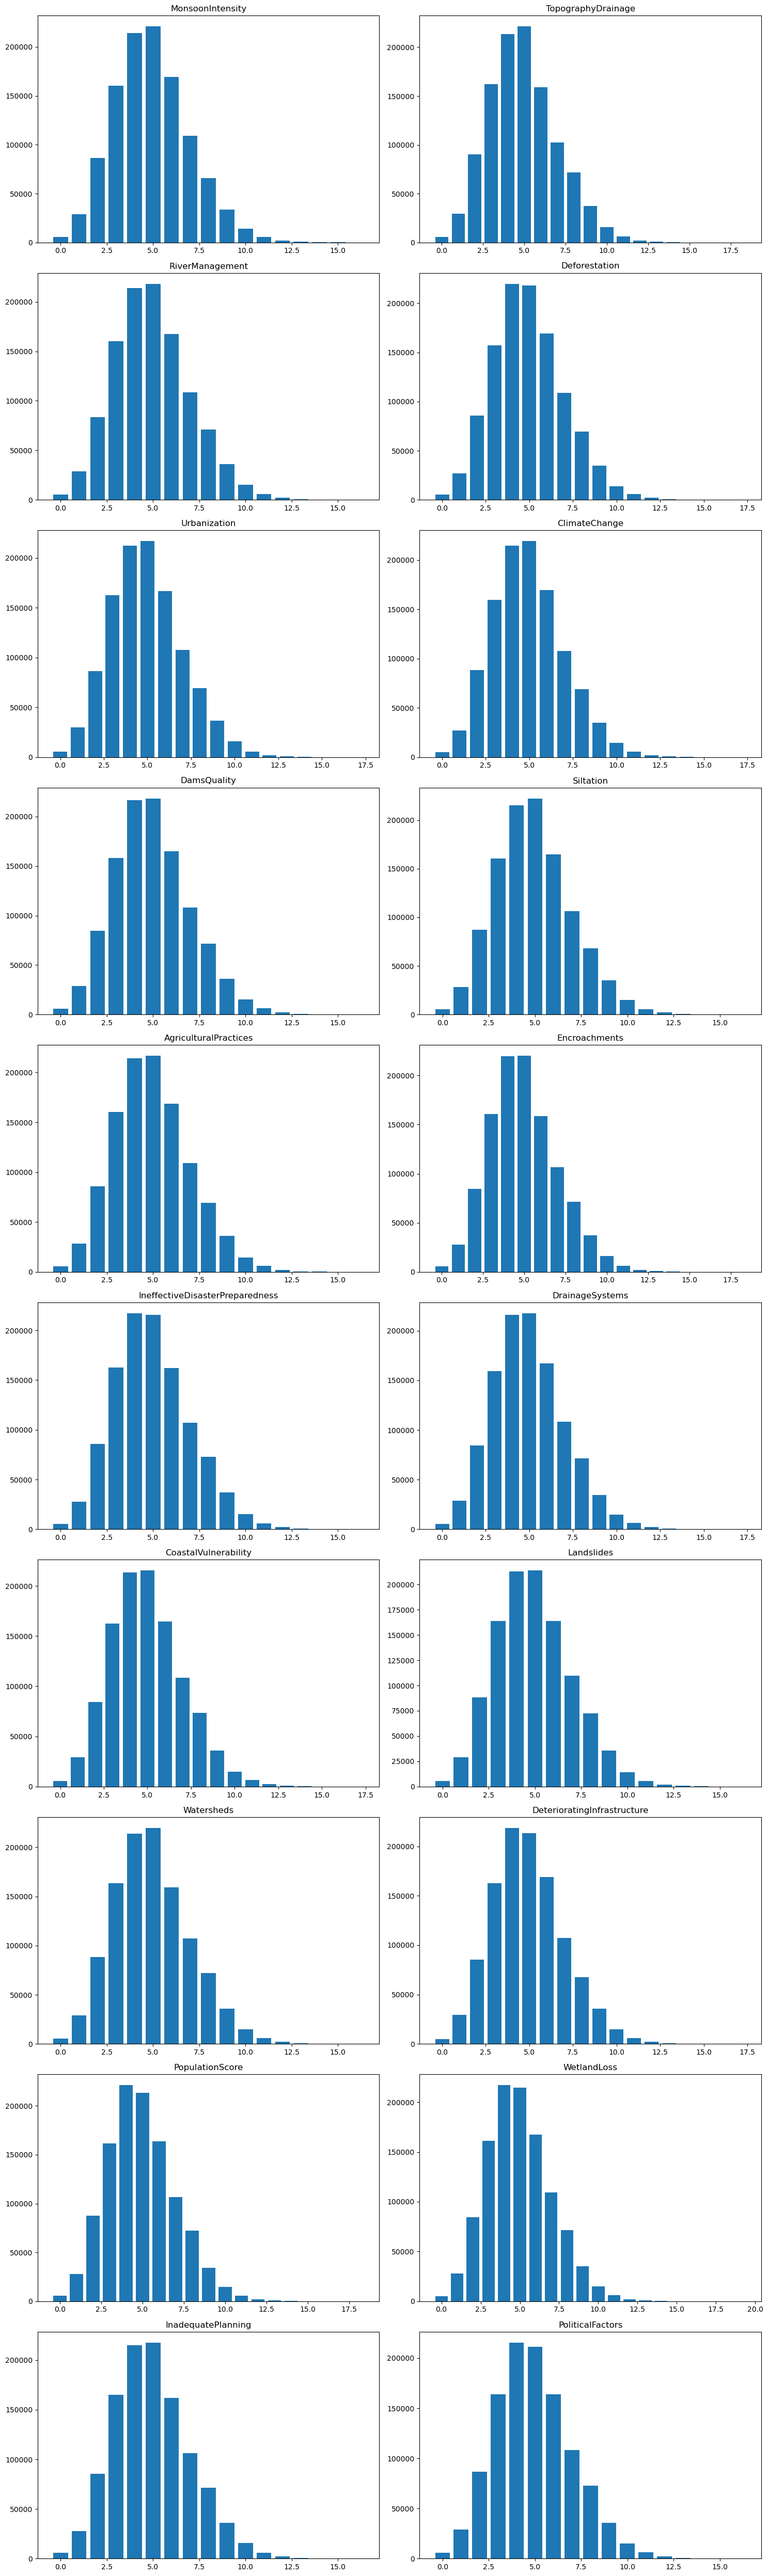

In [16]:
data = df_train
num_cols = len(columns)

# num_rows = (num_cols + 1) // 2
num_rows = 10
num_cols_subplot = 2

fig, axs = plt.subplots(num_rows, num_cols_subplot, figsize=(15, 5*num_rows))

for i, col in enumerate(columns[1:-1]):
    row_idx = i // num_cols_subplot
    col_idx = i % num_cols_subplot
    axs[row_idx, col_idx].bar(data[col].value_counts().keys(), df_train[col].value_counts().values)
    axs[row_idx, col_idx].set_title(col)

plt.tight_layout()
plt.show()

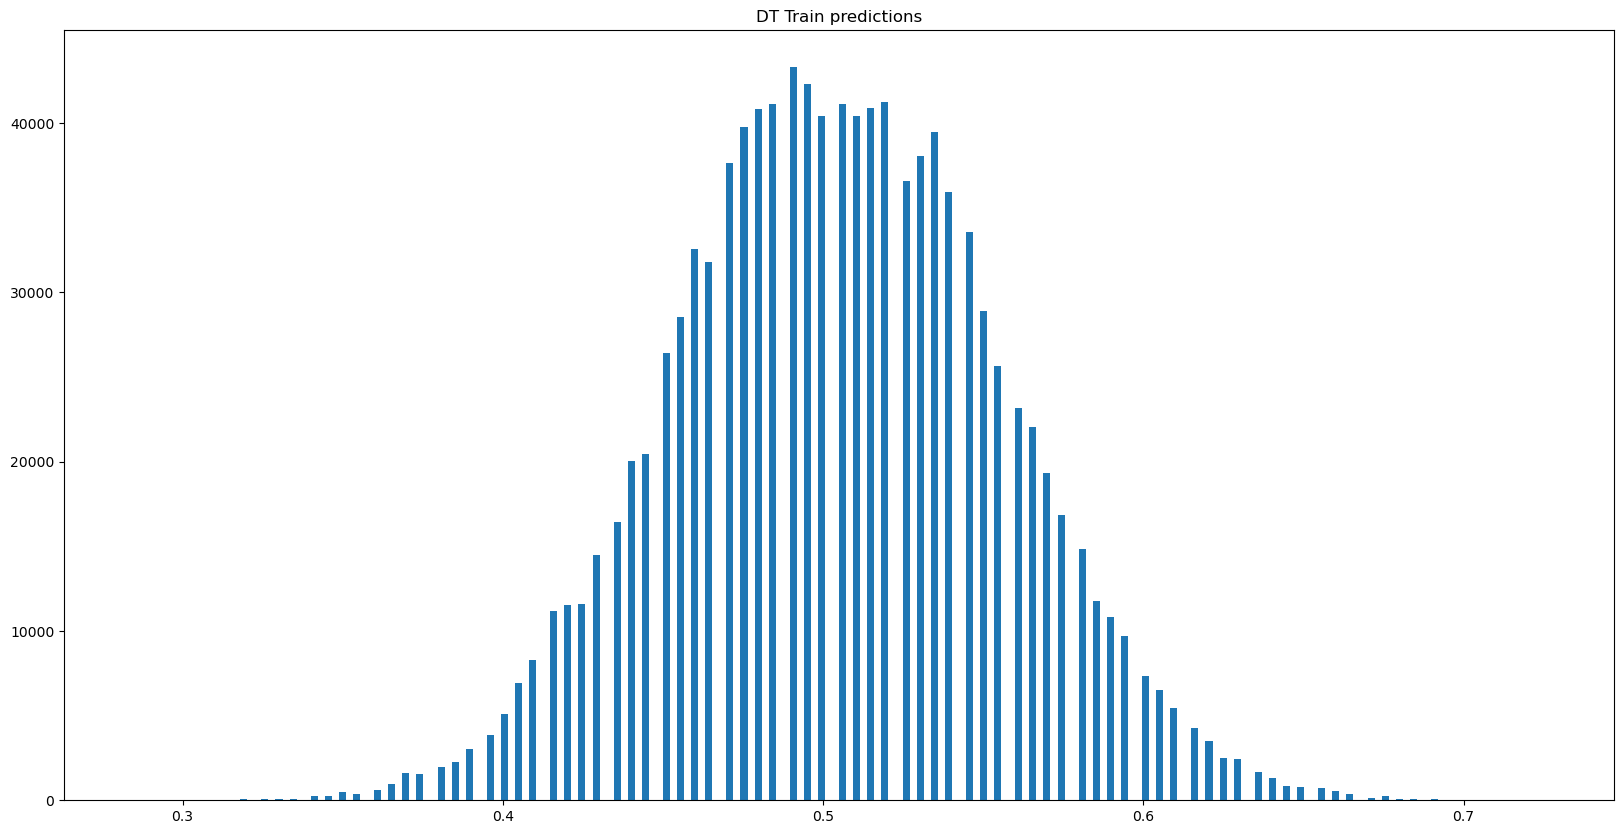

In [148]:
plt.figure(figsize=(20, 10))
plt.title("DT Train predictions")
df_train[columns[-1]].hist(bins = 200)
plt.grid(False)
plt.show()

#### Null Values

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

#### Unique Values

In [8]:
unique_counts = df_train.nunique().to_frame().rename(columns={0: 'Unique Value Count'})
unique_counts

Unique Value Count
id                                          1117957
MonsoonIntensity                                 17
TopographyDrainage                               19
RiverManagement                                  17
Deforestation                                    18
Urbanization                                     18
ClimateChange                                    18
DamsQuality                                      17
Siltation                                        17
AgriculturalPractices                            17
Encroachments                                    19
IneffectiveDisasterPreparedness                  17
DrainageSystems                                  18
CoastalVulnerability                             18
Landslides                                       17
Watersheds                                       17
DeterioratingInfrastructure                      18
PopulationScore                                  19
WetlandLoss                                      20
InadequatePlanning                               17
PoliticalFactors                                 17
FloodProbability                                 83

#### Zero Values

In [9]:
zeros = df_train.isin({0}).sum()
zeros

id                                    1
MonsoonIntensity                   5431
TopographyDrainage                 5541
RiverManagement                    5407
Deforestation                      5327
Urbanization                       5350
ClimateChange                      5347
DamsQuality                        5878
Siltation                          5381
AgriculturalPractices              5680
Encroachments                      5531
IneffectiveDisasterPreparedness    5410
DrainageSystems                    5582
CoastalVulnerability               5747
Landslides                         5516
Watersheds                         5404
DeterioratingInfrastructure        4953
PopulationScore                    5536
WetlandLoss                        5192
InadequatePlanning                 5619
PoliticalFactors                   5995
FloodProbability                      0
dtype: int64

#### Box Plot and Scatter Plot Data 

In [4]:
columns = df_train.iloc[:, 1:].columns

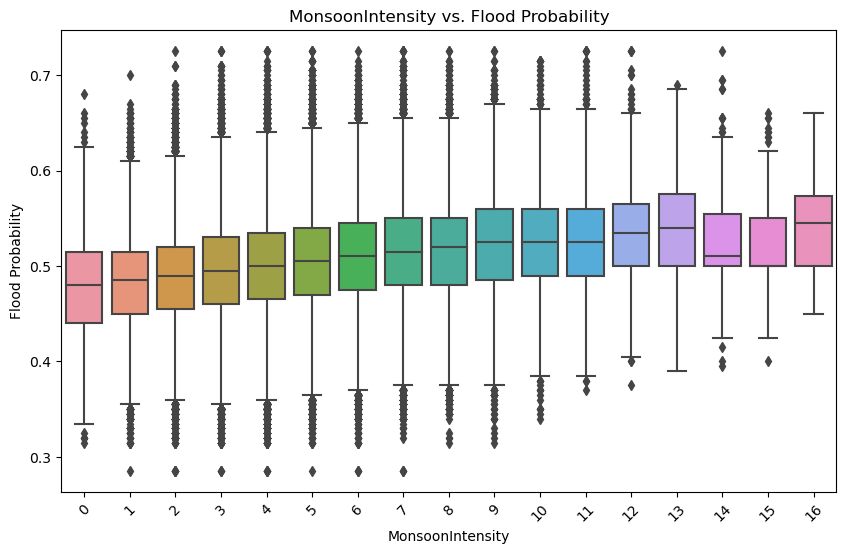

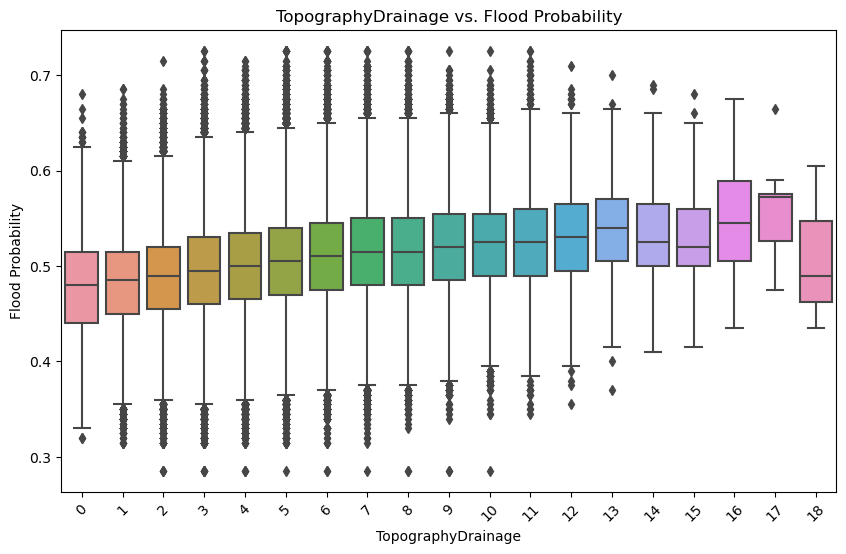

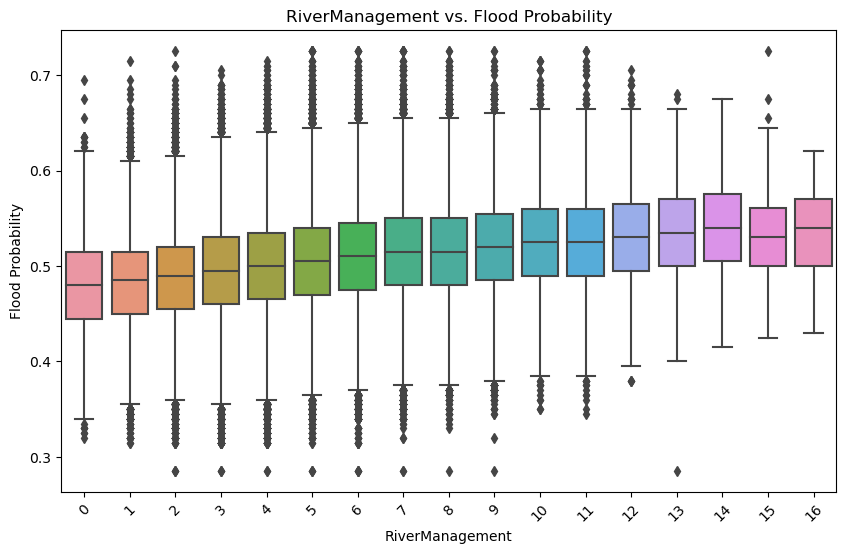

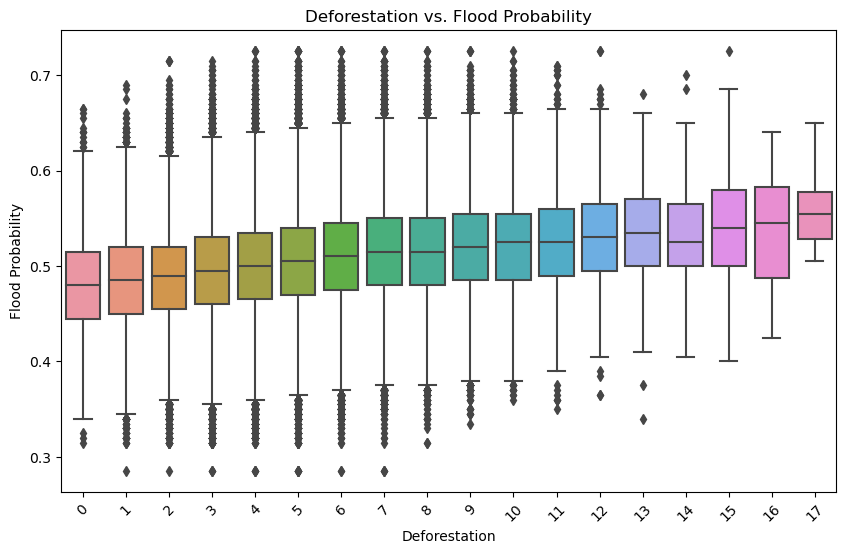

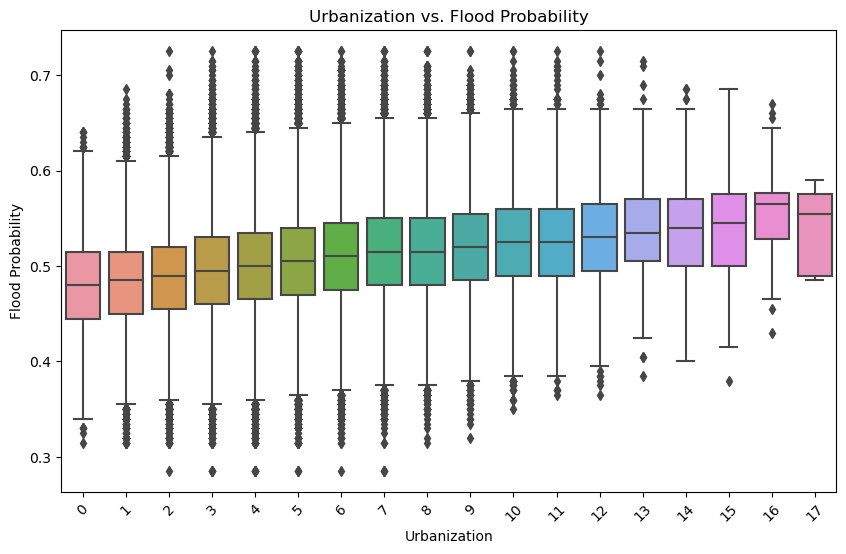

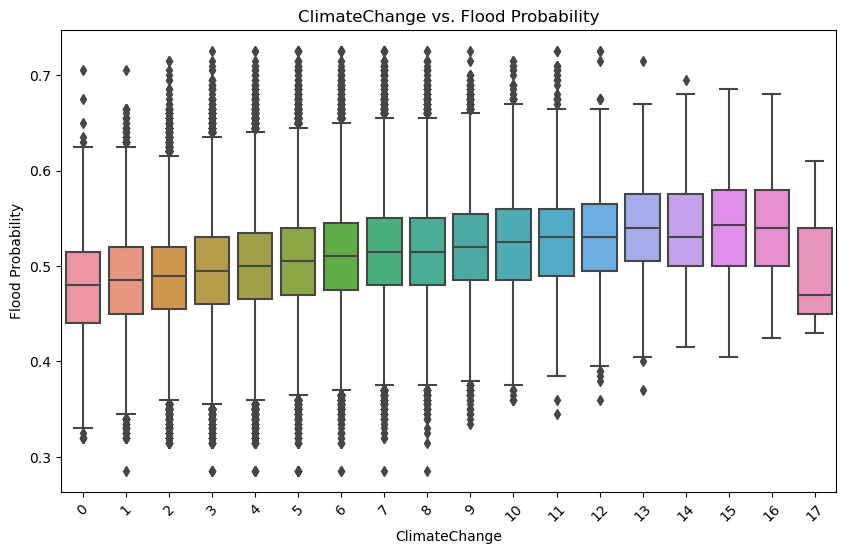

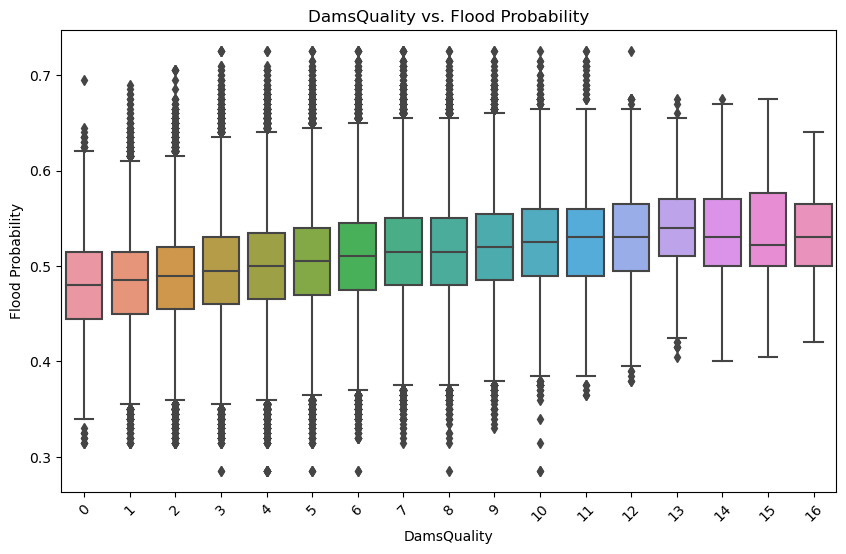

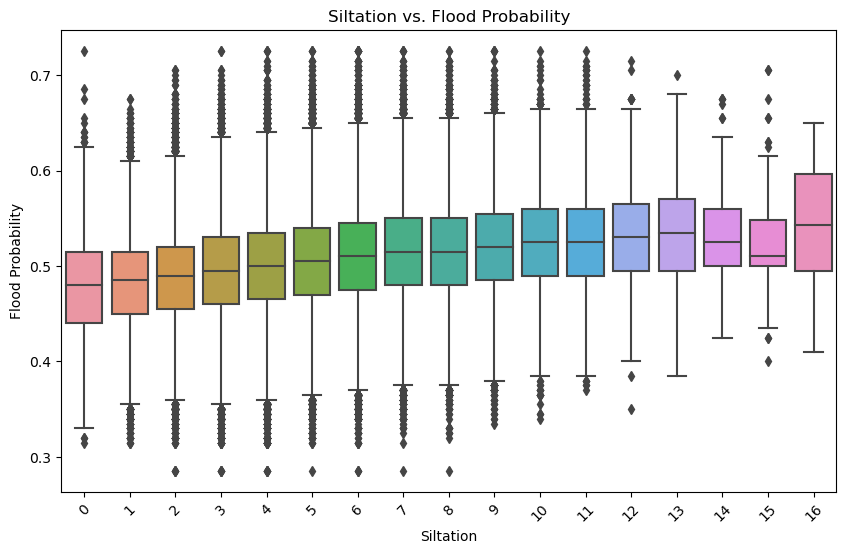

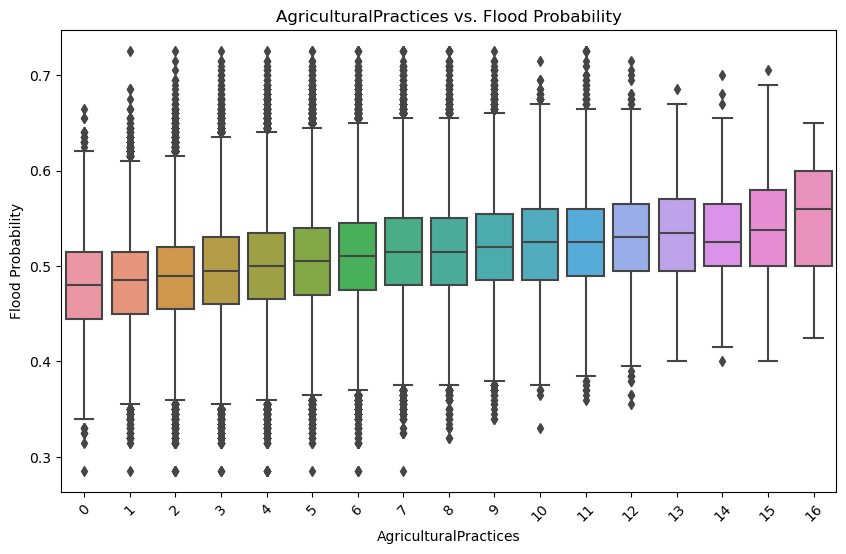

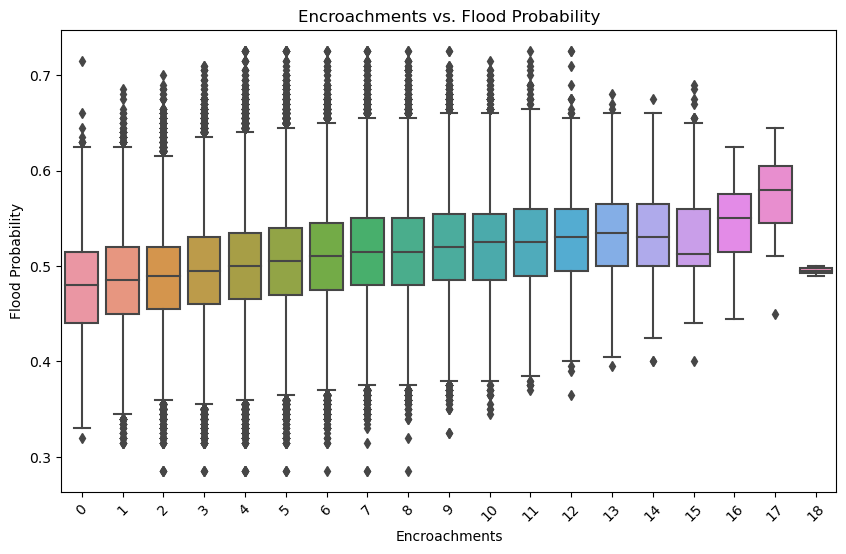

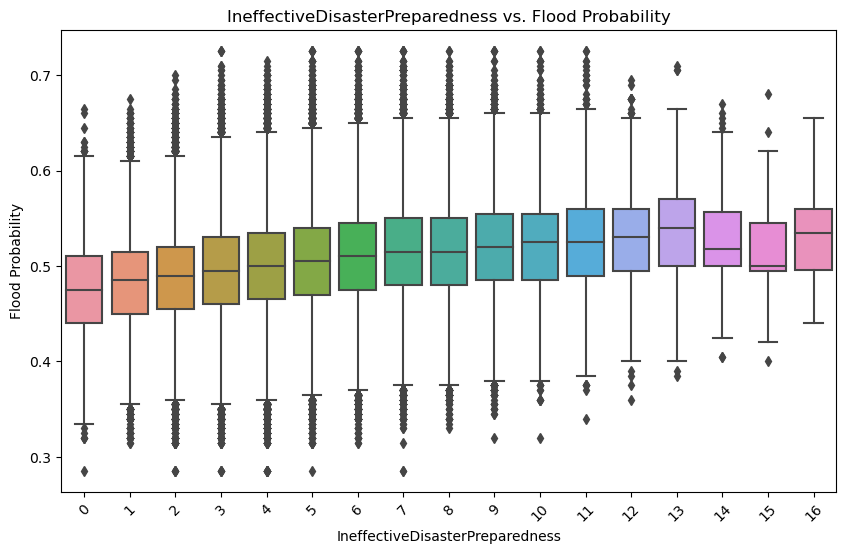

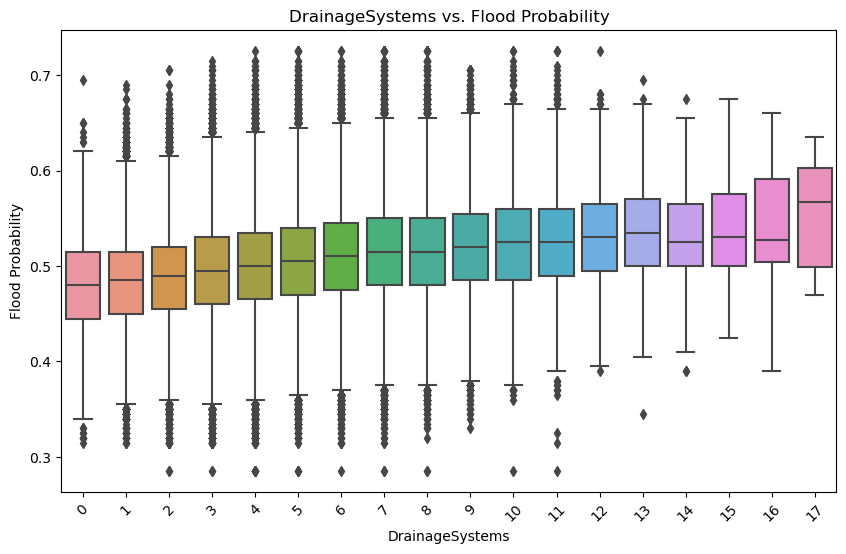

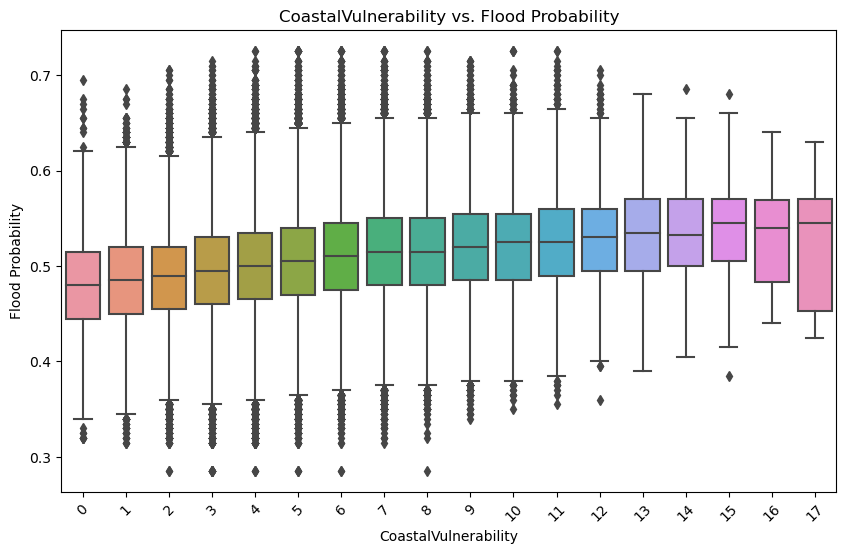

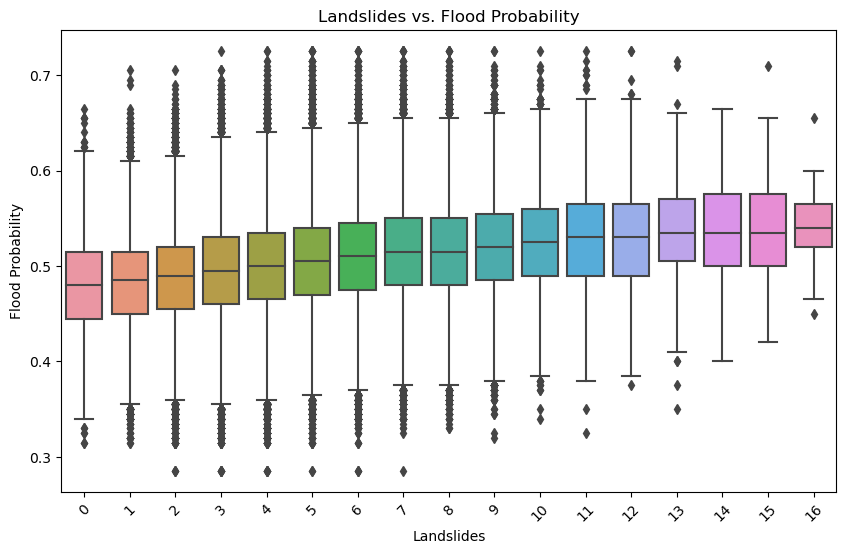

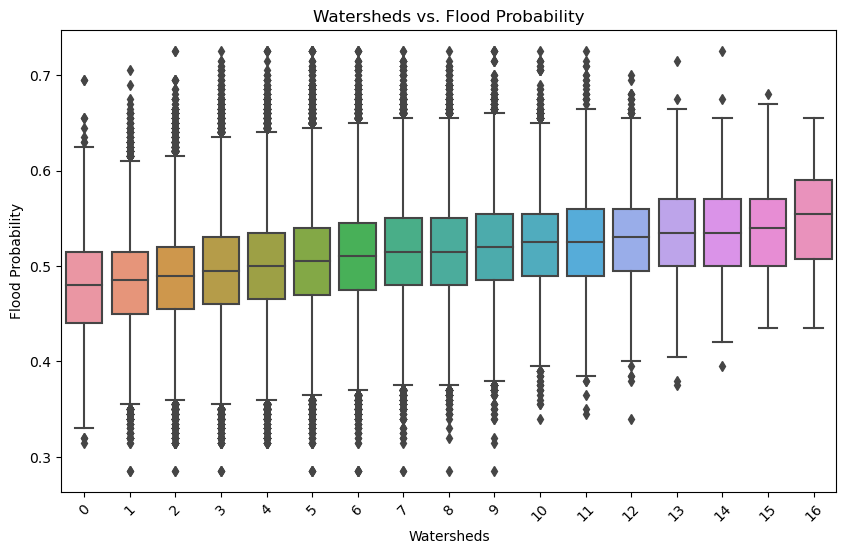

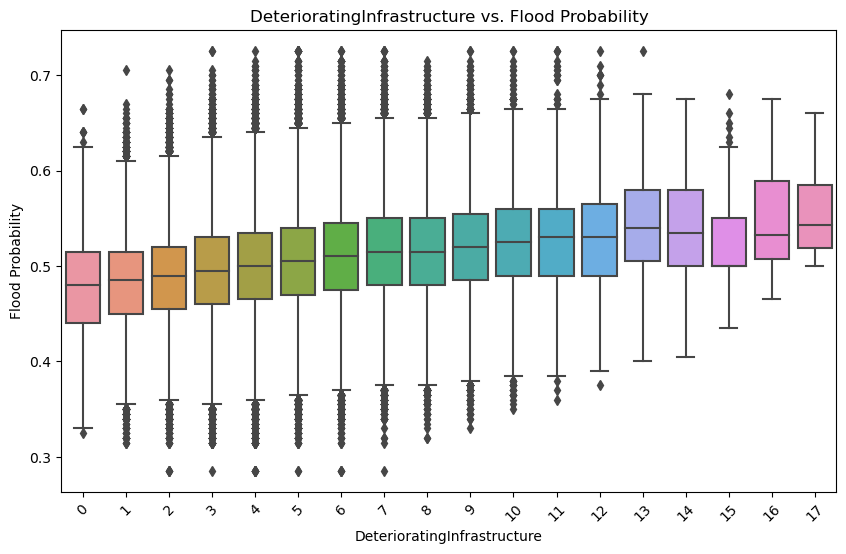

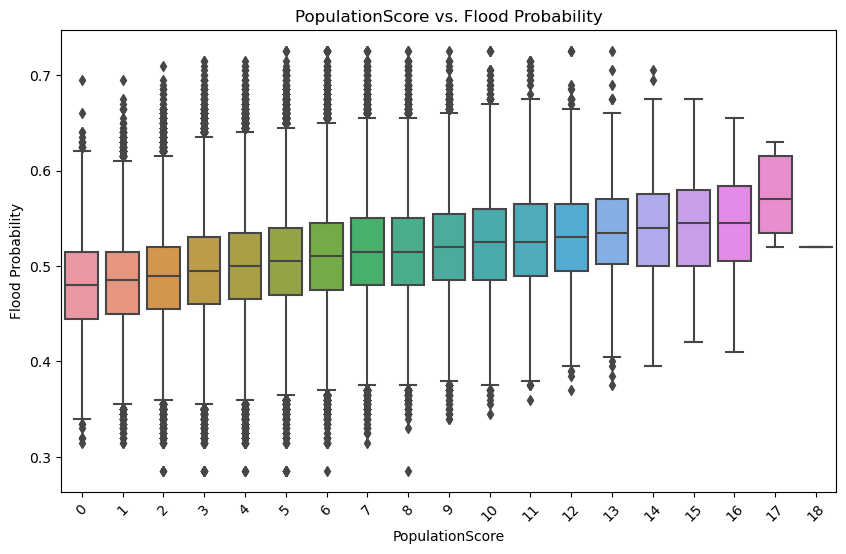

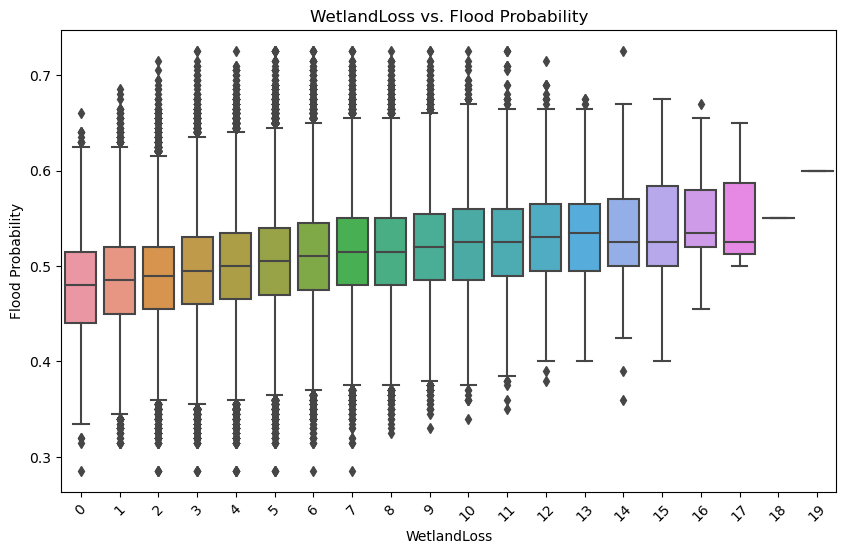

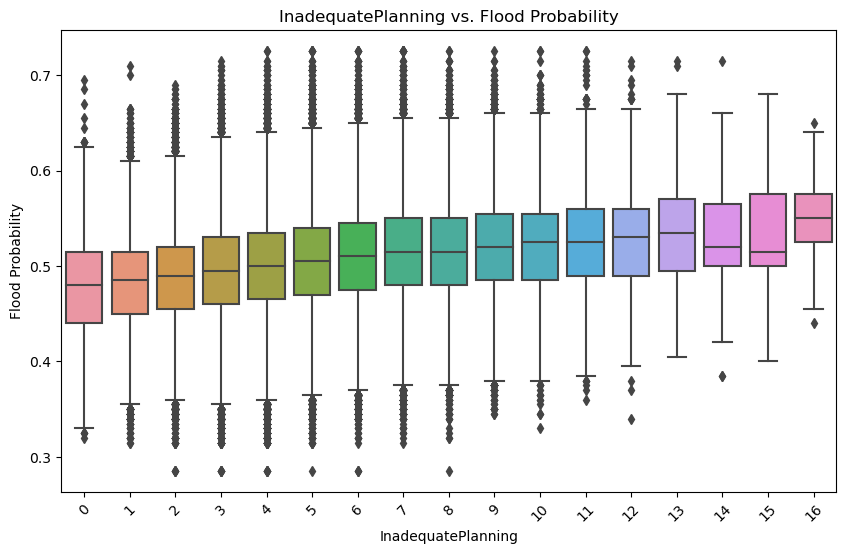

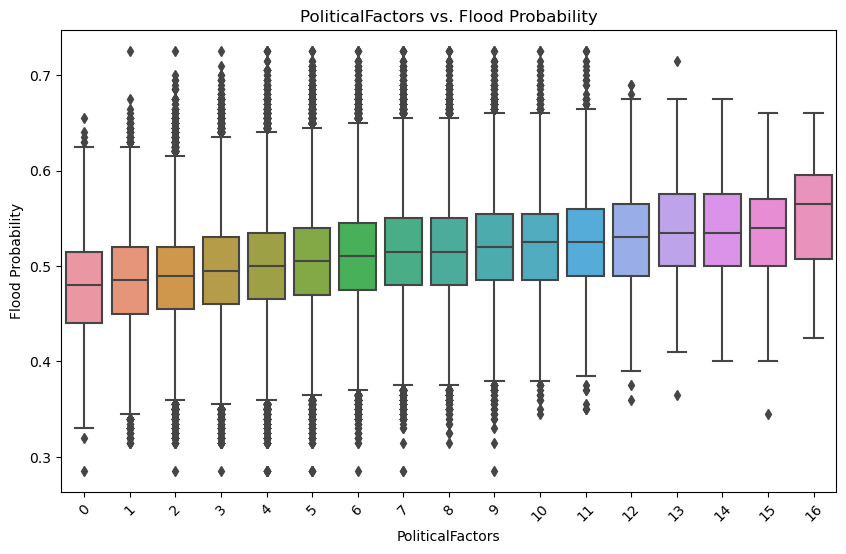

In [5]:
# Iterate through each feature
for feature in columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='FloodProbability', data=df_train)
    plt.title(f'{feature} vs. Flood Probability')
    plt.xlabel(feature)
    plt.ylabel('Flood Probability')
    plt.xticks(rotation=45)
    plt.show()

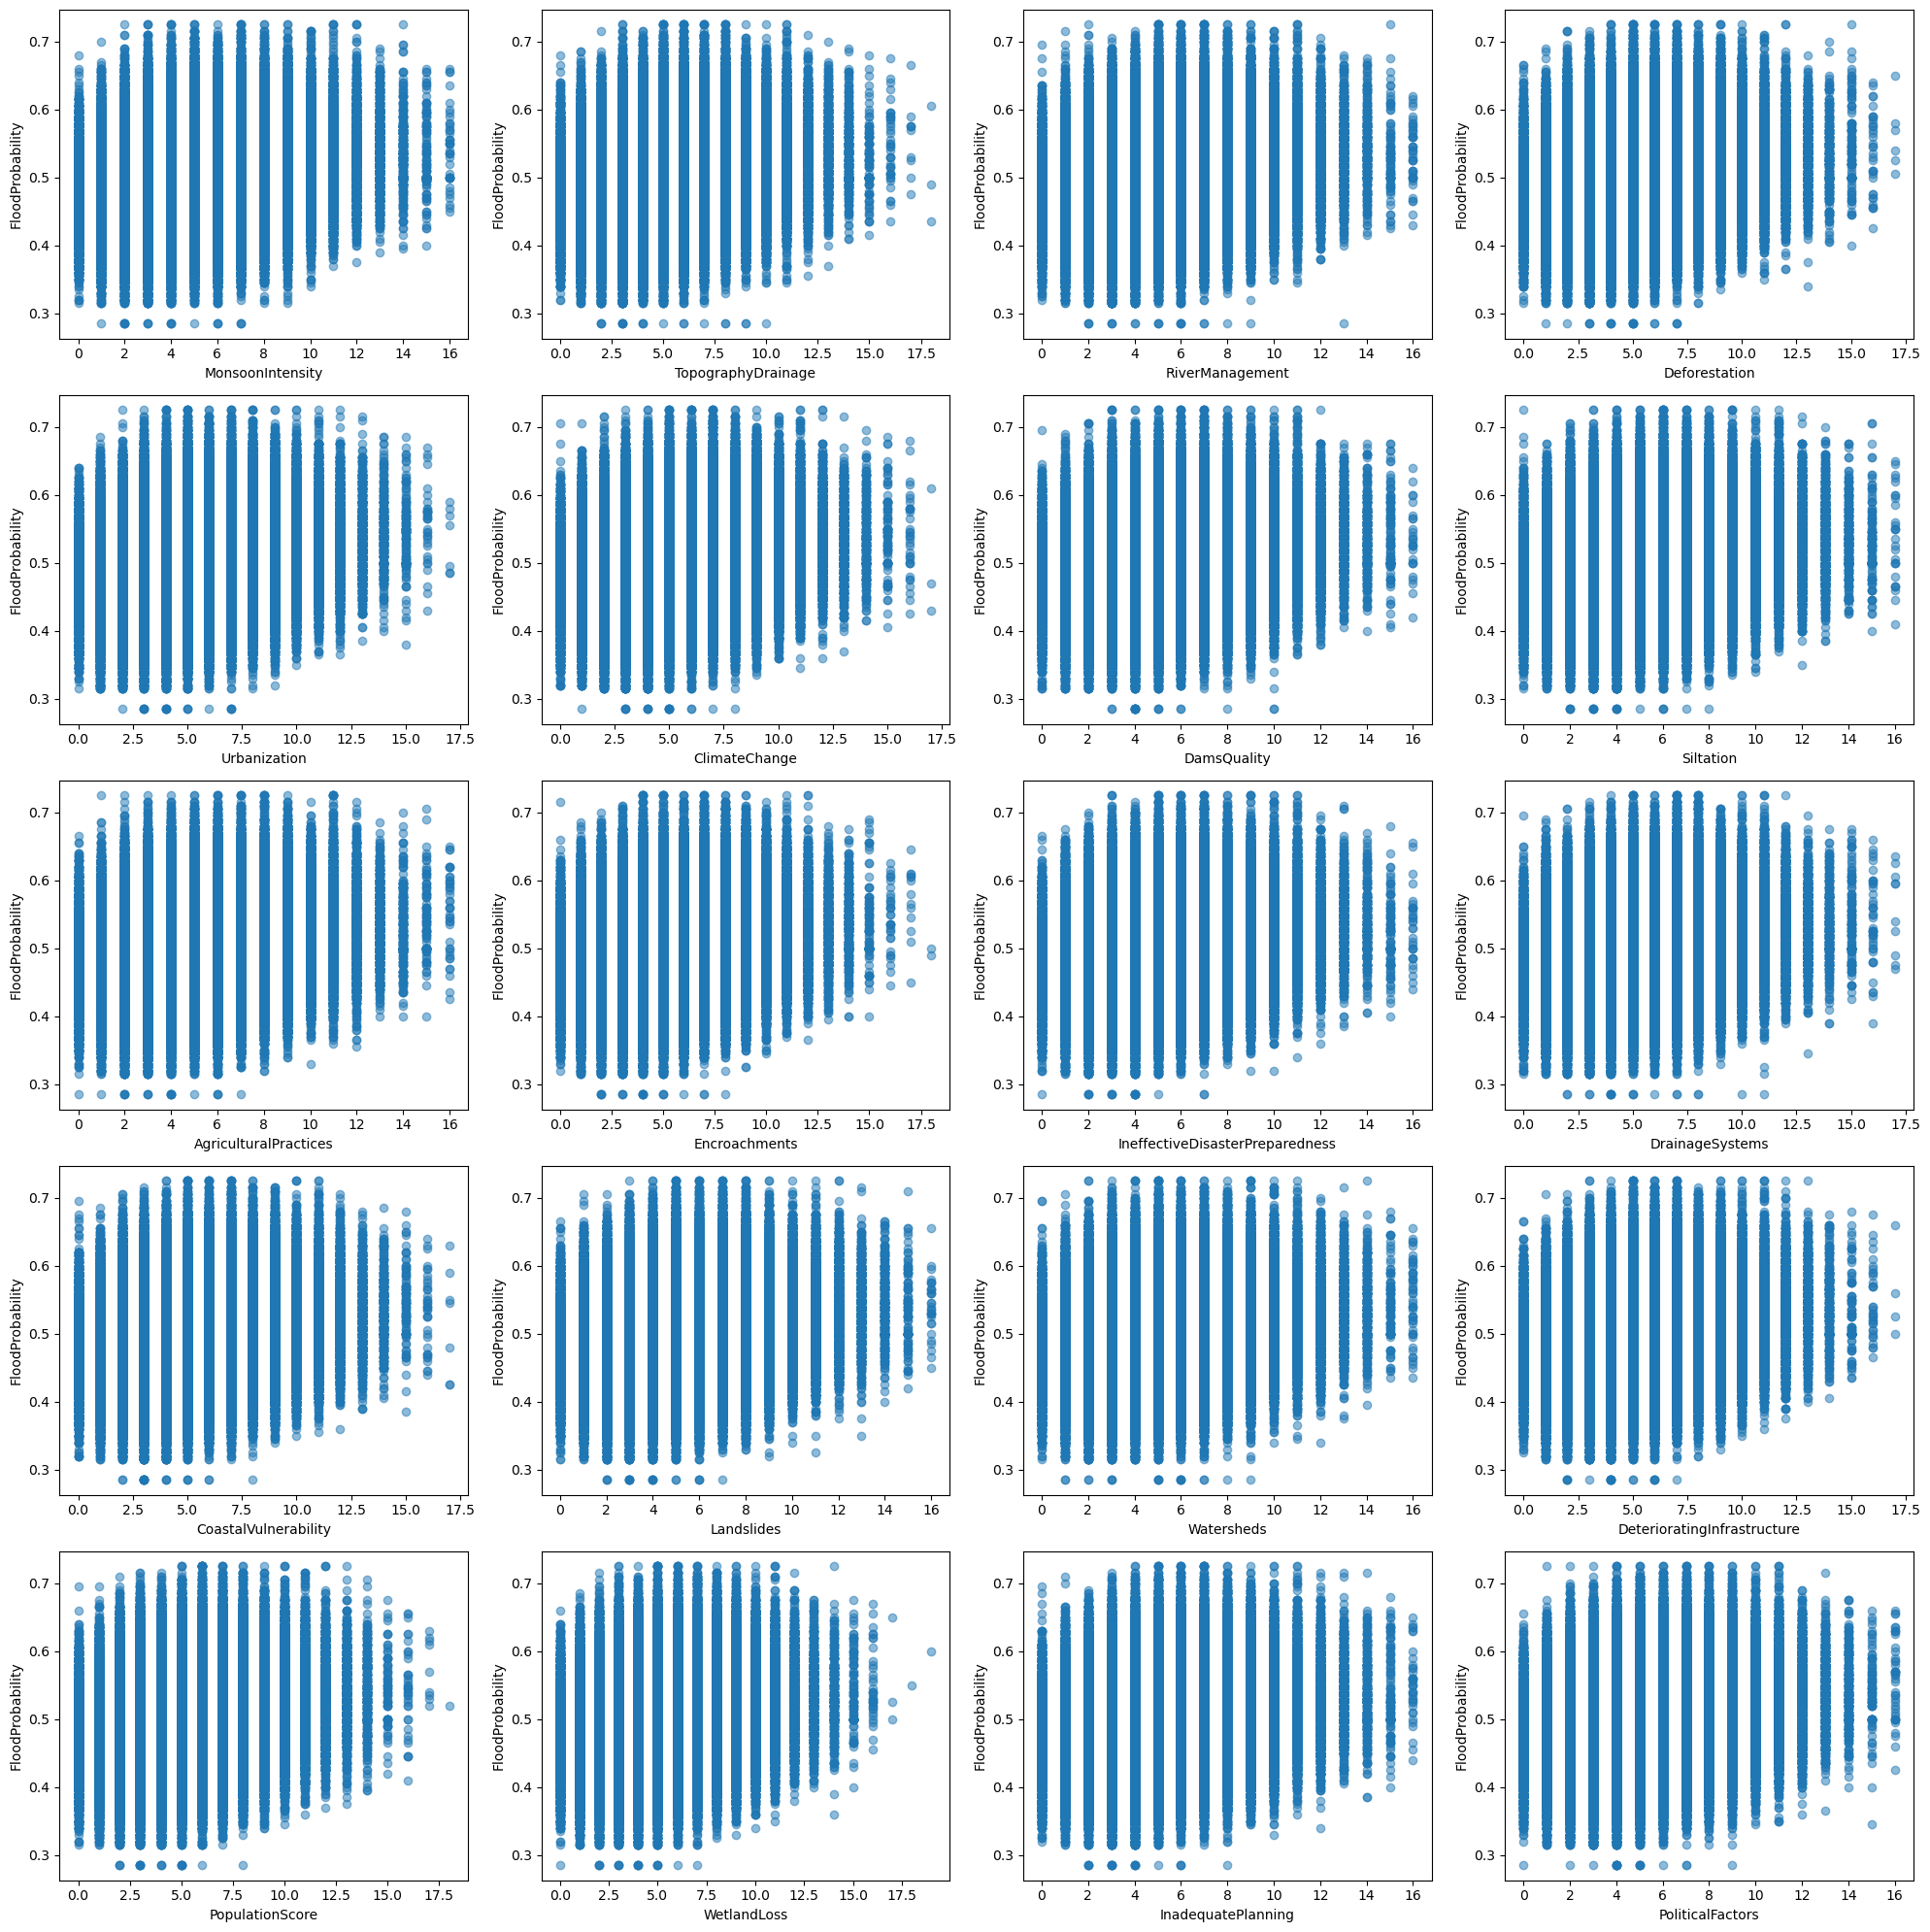

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

for i, feature in enumerate(columns[:-1]):
    ax = axes[i // 4, i % 4]
    ax.scatter(df_train[feature], df_train['FloodProbability'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('FloodProbability')

plt.tight_layout()
plt.show()

In [12]:
# checking non linearity before that identify the skewness of the data 
# Check skewness of features
skewness = df_train[columns[:-1]].skew()
print(skewness)

# Select highly skewed features (skewness > 1 or < -1)
skewed_features = skewness[abs(skewness) > 1].index.tolist()
print(f'Skewed features: {skewed_features}')

MonsoonIntensity                   0.444528
TopographyDrainage                 0.458728
RiverManagement                    0.426491
Deforestation                      0.434314
Urbanization                       0.442168
ClimateChange                      0.429403
DamsQuality                        0.441402
Siltation                          0.449248
AgriculturalPractices              0.421145
Encroachments                      0.463551
IneffectiveDisasterPreparedness    0.443369
DrainageSystems                    0.441420
CoastalVulnerability               0.439917
Landslides                         0.425099
Watersheds                         0.450488
DeterioratingInfrastructure        0.444167
PopulationScore                    0.451415
WetlandLoss                        0.437045
InadequatePlanning                 0.455136
PoliticalFactors                   0.437561
dtype: float64
Skewed features: []


#### Range Values

In [13]:
df_train.describe().loc[['min', 'max']].T

min          max
id                               0.000  1117956.000
MonsoonIntensity                 0.000       16.000
TopographyDrainage               0.000       18.000
RiverManagement                  0.000       16.000
Deforestation                    0.000       17.000
Urbanization                     0.000       17.000
ClimateChange                    0.000       17.000
DamsQuality                      0.000       16.000
Siltation                        0.000       16.000
AgriculturalPractices            0.000       16.000
Encroachments                    0.000       18.000
IneffectiveDisasterPreparedness  0.000       16.000
DrainageSystems                  0.000       17.000
CoastalVulnerability             0.000       17.000
Landslides                       0.000       16.000
Watersheds                       0.000       16.000
DeterioratingInfrastructure      0.000       17.000
PopulationScore                  0.000       18.000
WetlandLoss                      0.000       19.000
InadequatePlanning               0.000       16.000
PoliticalFactors                 0.000       16.000
FloodProbability                 0.285        0.725

#### Ouliers

In [13]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def detect_outliers_subplots(data, features):
    fig = make_subplots(rows=len(features)//2 + len(features)%2, cols=2, subplot_titles=features)

    outliers = pd.DataFrame()
    row = 1
    col = 1
    for i, feature in enumerate(features):
        q1 = data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outliers = pd.concat([outliers, feature_outliers])
        
        # Print the count of outliers for the current feature
        print(f"Number of outliers in {feature}: {len(feature_outliers)}")
        
        # Create box plot for the current feature
        box = go.Box(y=data[feature], name=feature)
        fig.add_trace(box, row=row, col=col)
        
        # Update subplot positioning
        col += 1
        if col > 2:
            col = 1
            row += 1
    
    # Update layout
    fig.update_layout(height=3000, width=1000, title_text="Box Plots of Features with Outliers")
    # fig.show()
    plotly.offline.plot(fig, filename='outliers.html')

    # Print the overall count of outliers
    print(f"\nTotal number of outliers: {len(outliers)}")

In [15]:
# Detect and visualize outliers
detect_outliers_subplots(df_train, columns[1:-1])

Number of outliers in MonsoonIntensity: 9244
Number of outliers in TopographyDrainage: 9575
Number of outliers in RiverManagement: 29617
Number of outliers in Deforestation: 28235
Number of outliers in Urbanization: 9184
Number of outliers in ClimateChange: 8702
Number of outliers in DamsQuality: 31097
Number of outliers in Siltation: 9079
Number of outliers in AgriculturalPractices: 9006
Number of outliers in Encroachments: 31141
Number of outliers in IneffectiveDisasterPreparedness: 8945
Number of outliers in DrainageSystems: 30060
Number of outliers in CoastalVulnerability: 10209
Number of outliers in Landslides: 8865
Number of outliers in Watersheds: 9245
Number of outliers in DeterioratingInfrastructure: 8971
Number of outliers in PopulationScore: 9290
Number of outliers in WetlandLoss: 29499
Number of outliers in InadequatePlanning: 9299
Number of outliers in PoliticalFactors: 9707

Total number of outliers: 308970


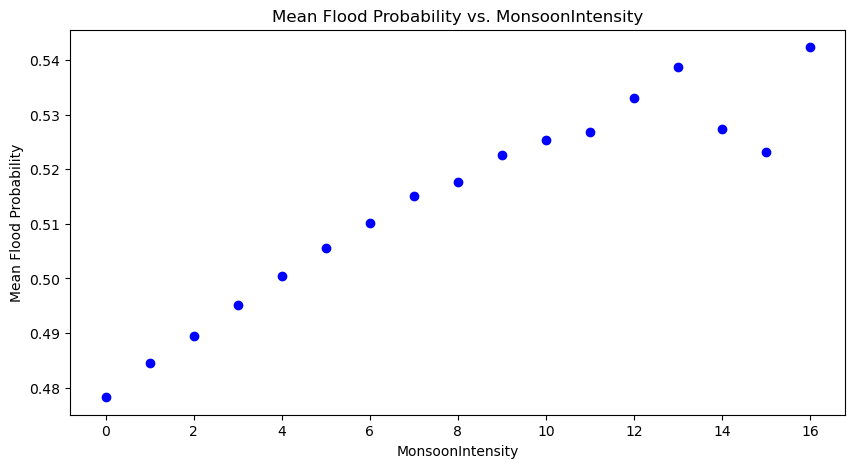

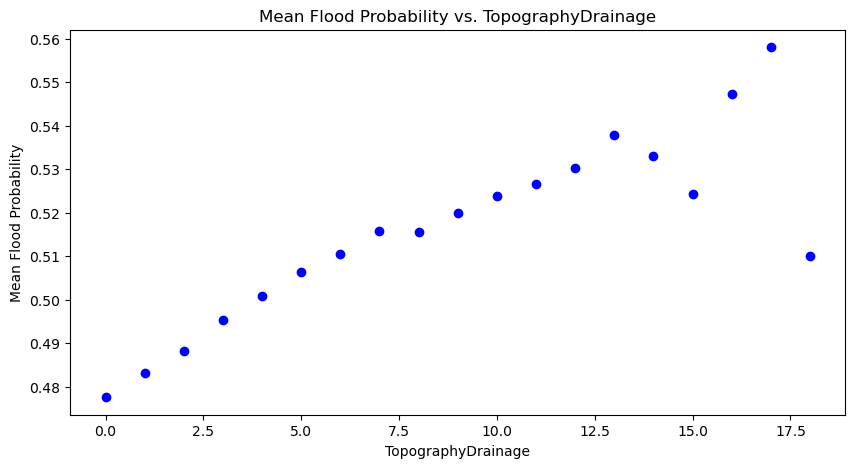

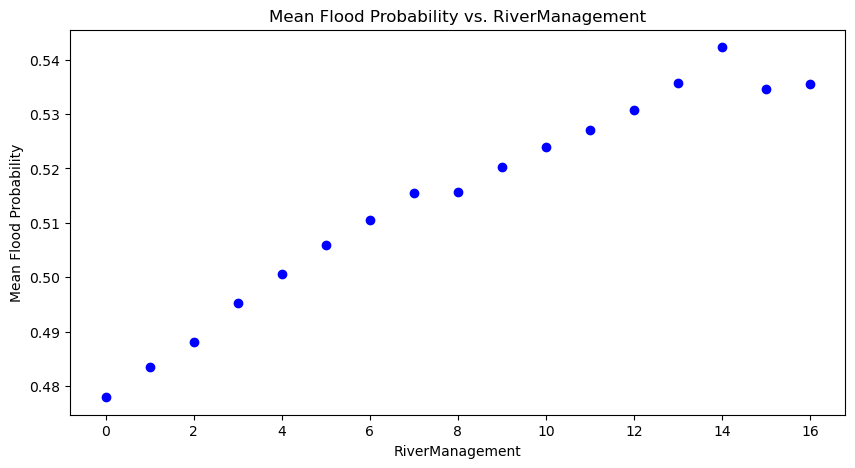

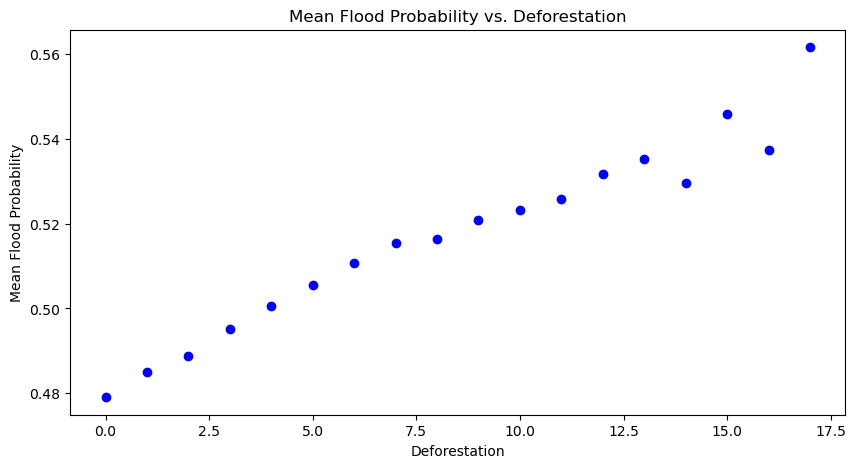

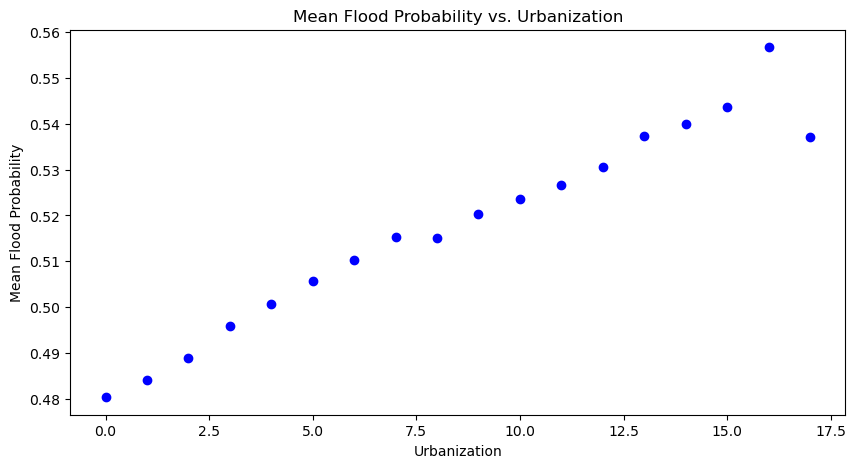

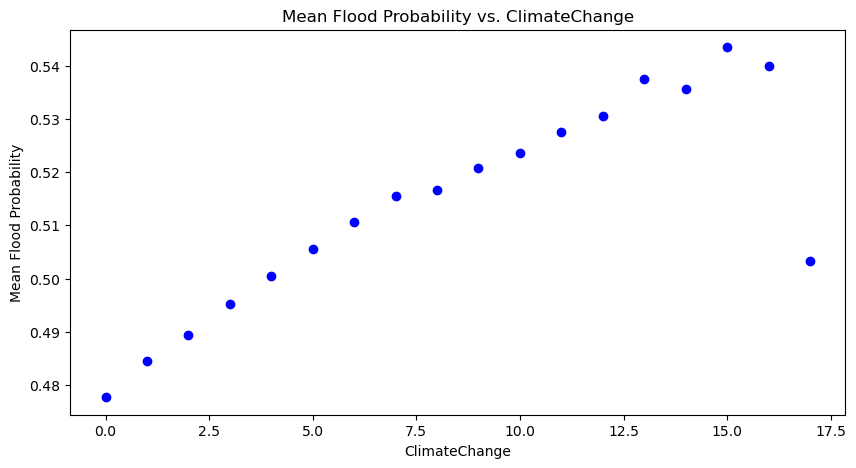

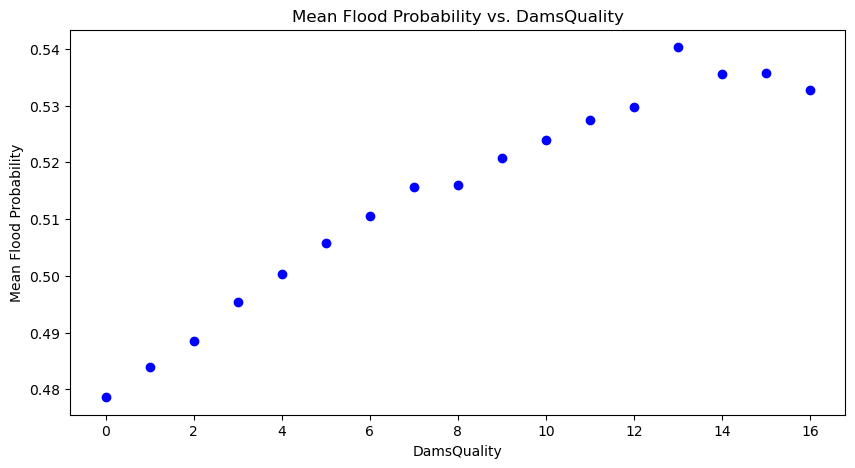

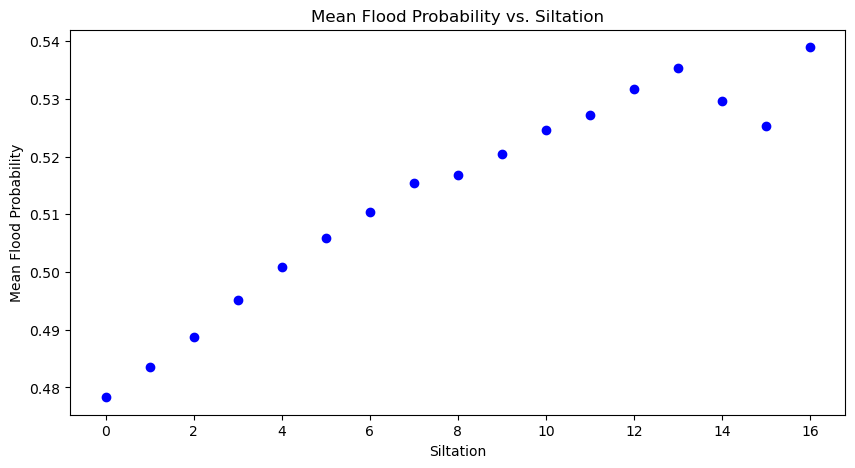

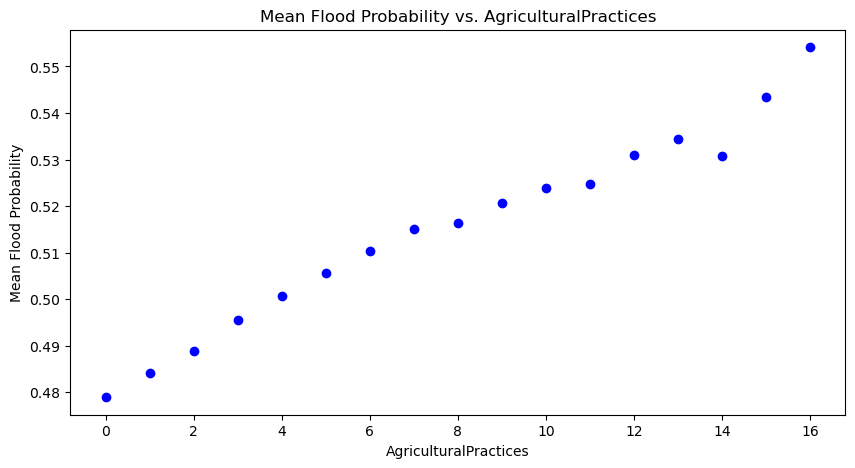

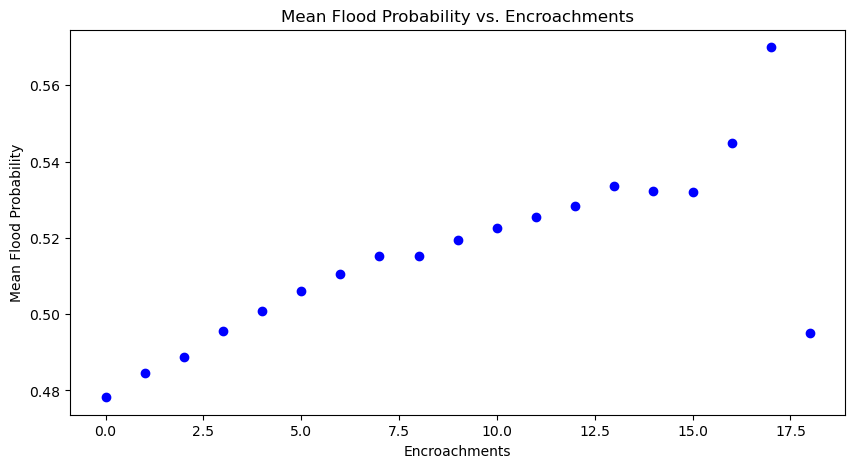

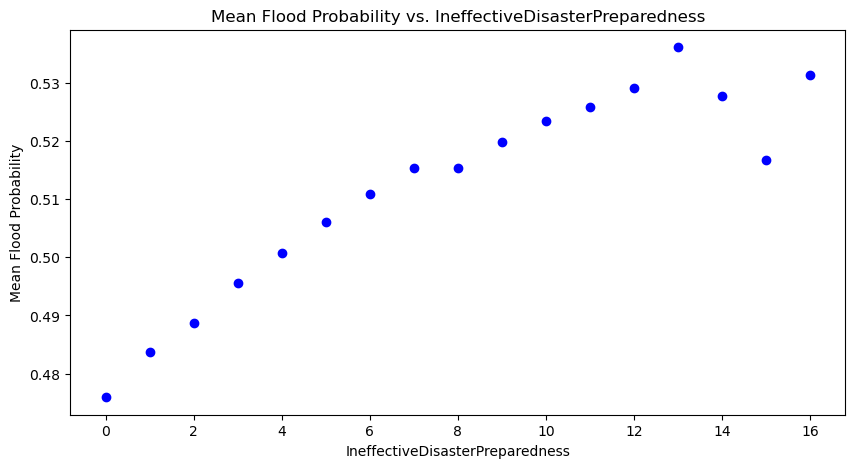

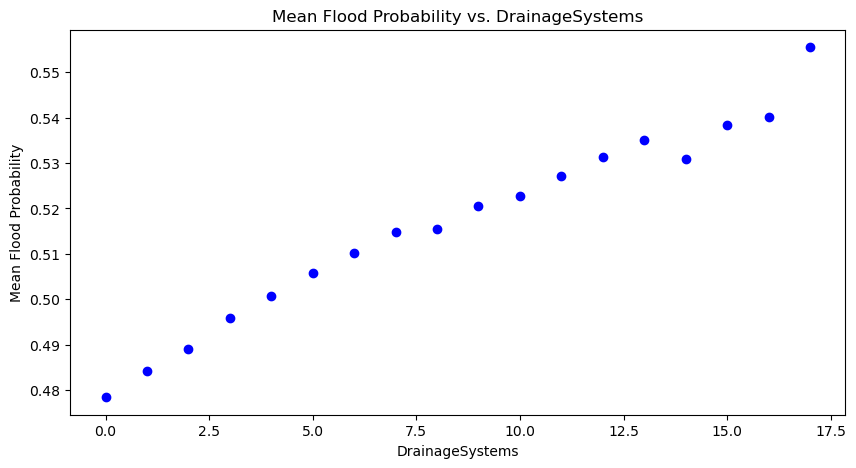

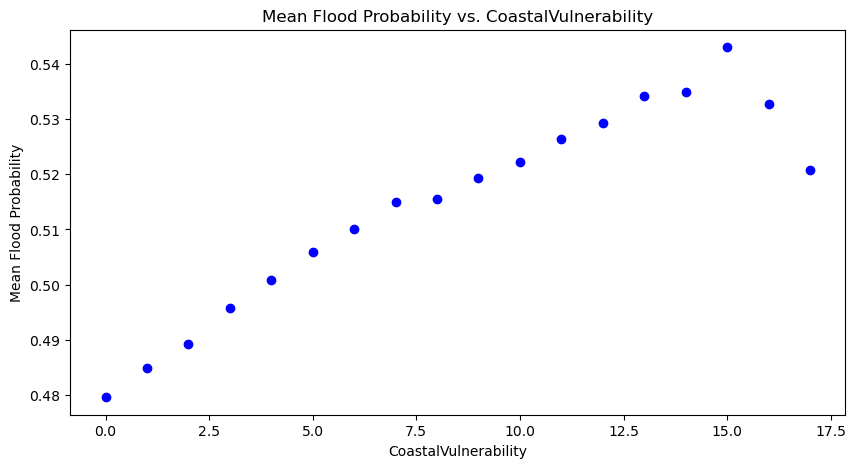

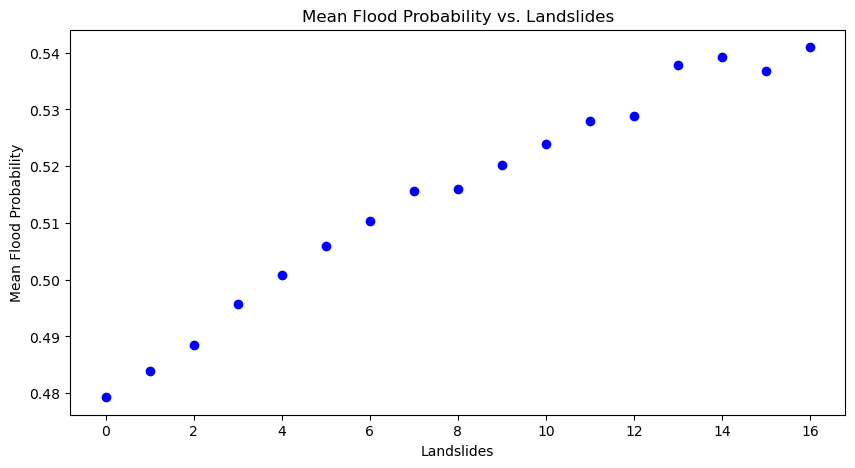

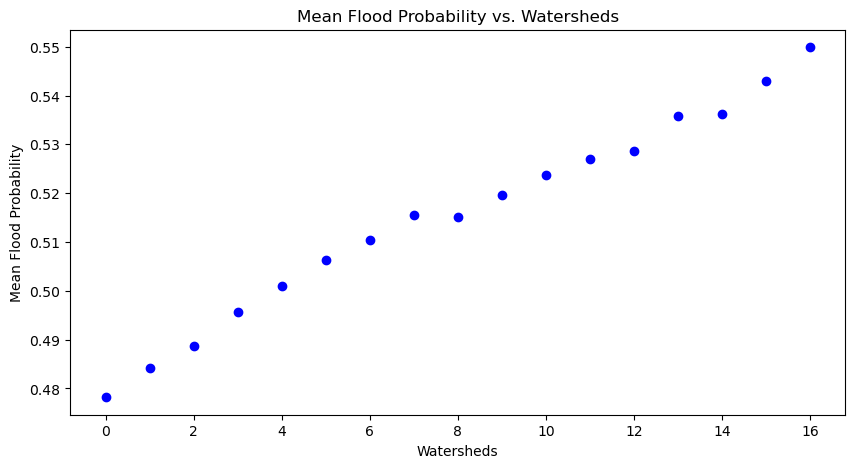

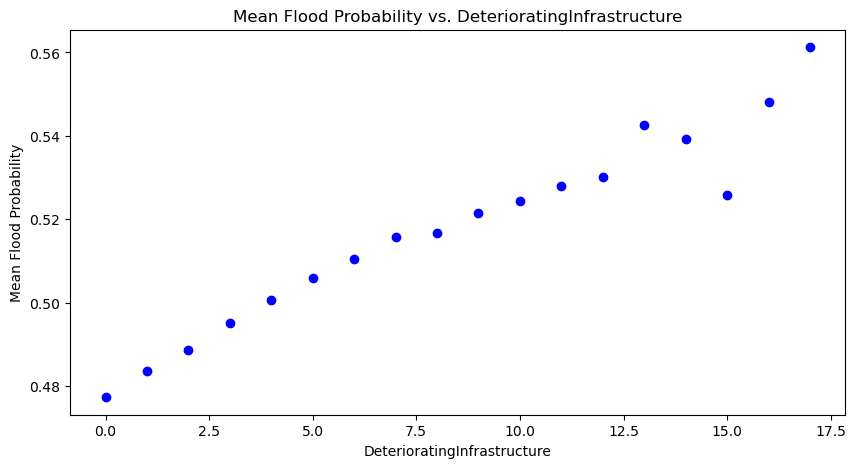

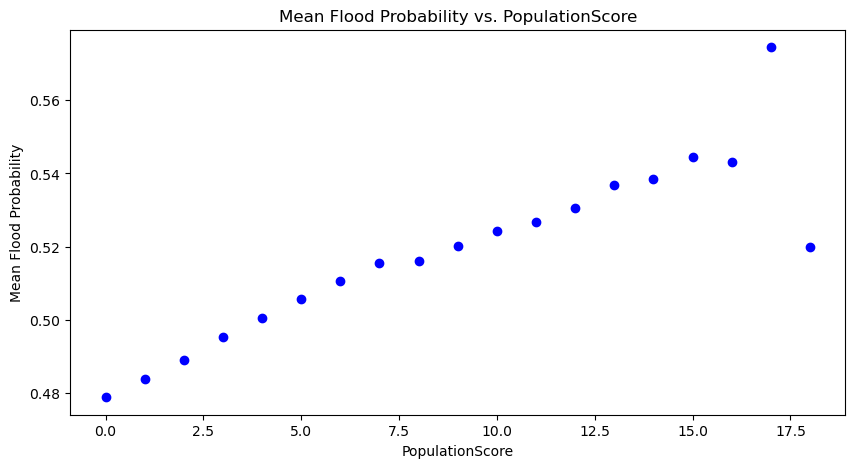

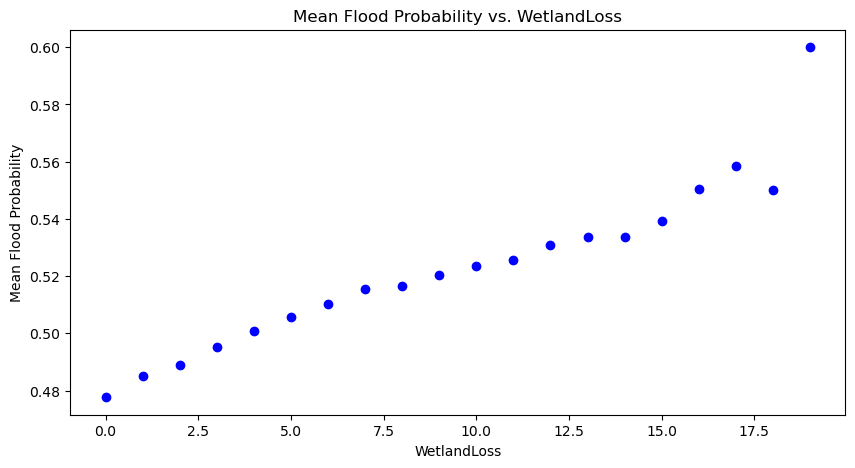

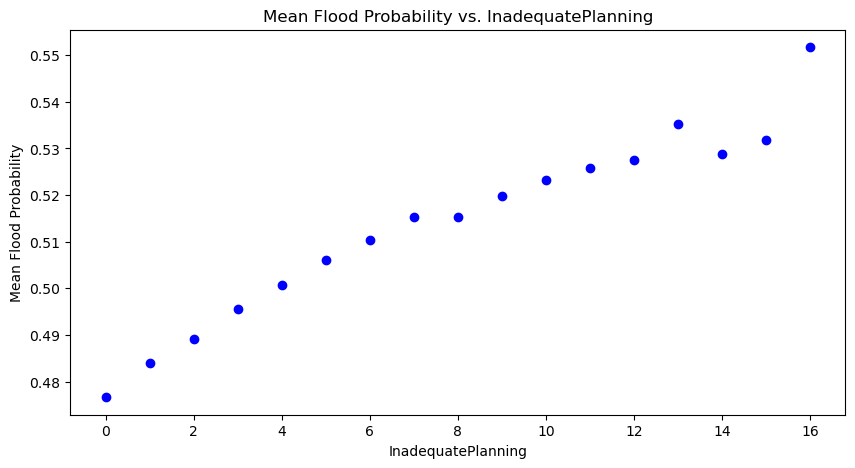

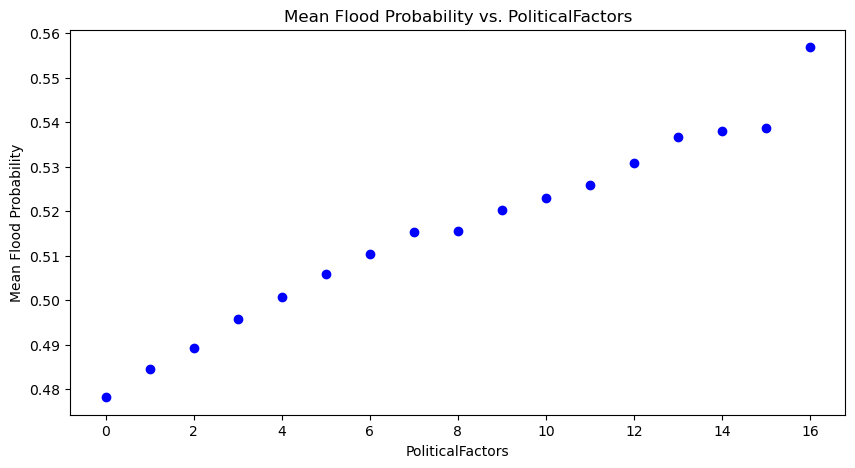

In [16]:
for column in df_train.columns[1:-1]:
    grouped = df_train.groupby(column)['FloodProbability'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    plt.scatter(grouped.index, grouped['FloodProbability'], c='blue')
    plt.xlabel(column)
    plt.ylabel('Mean Flood Probability')
    plt.title(f'Mean Flood Probability vs. {column}')
    plt.show()

<Axes: >

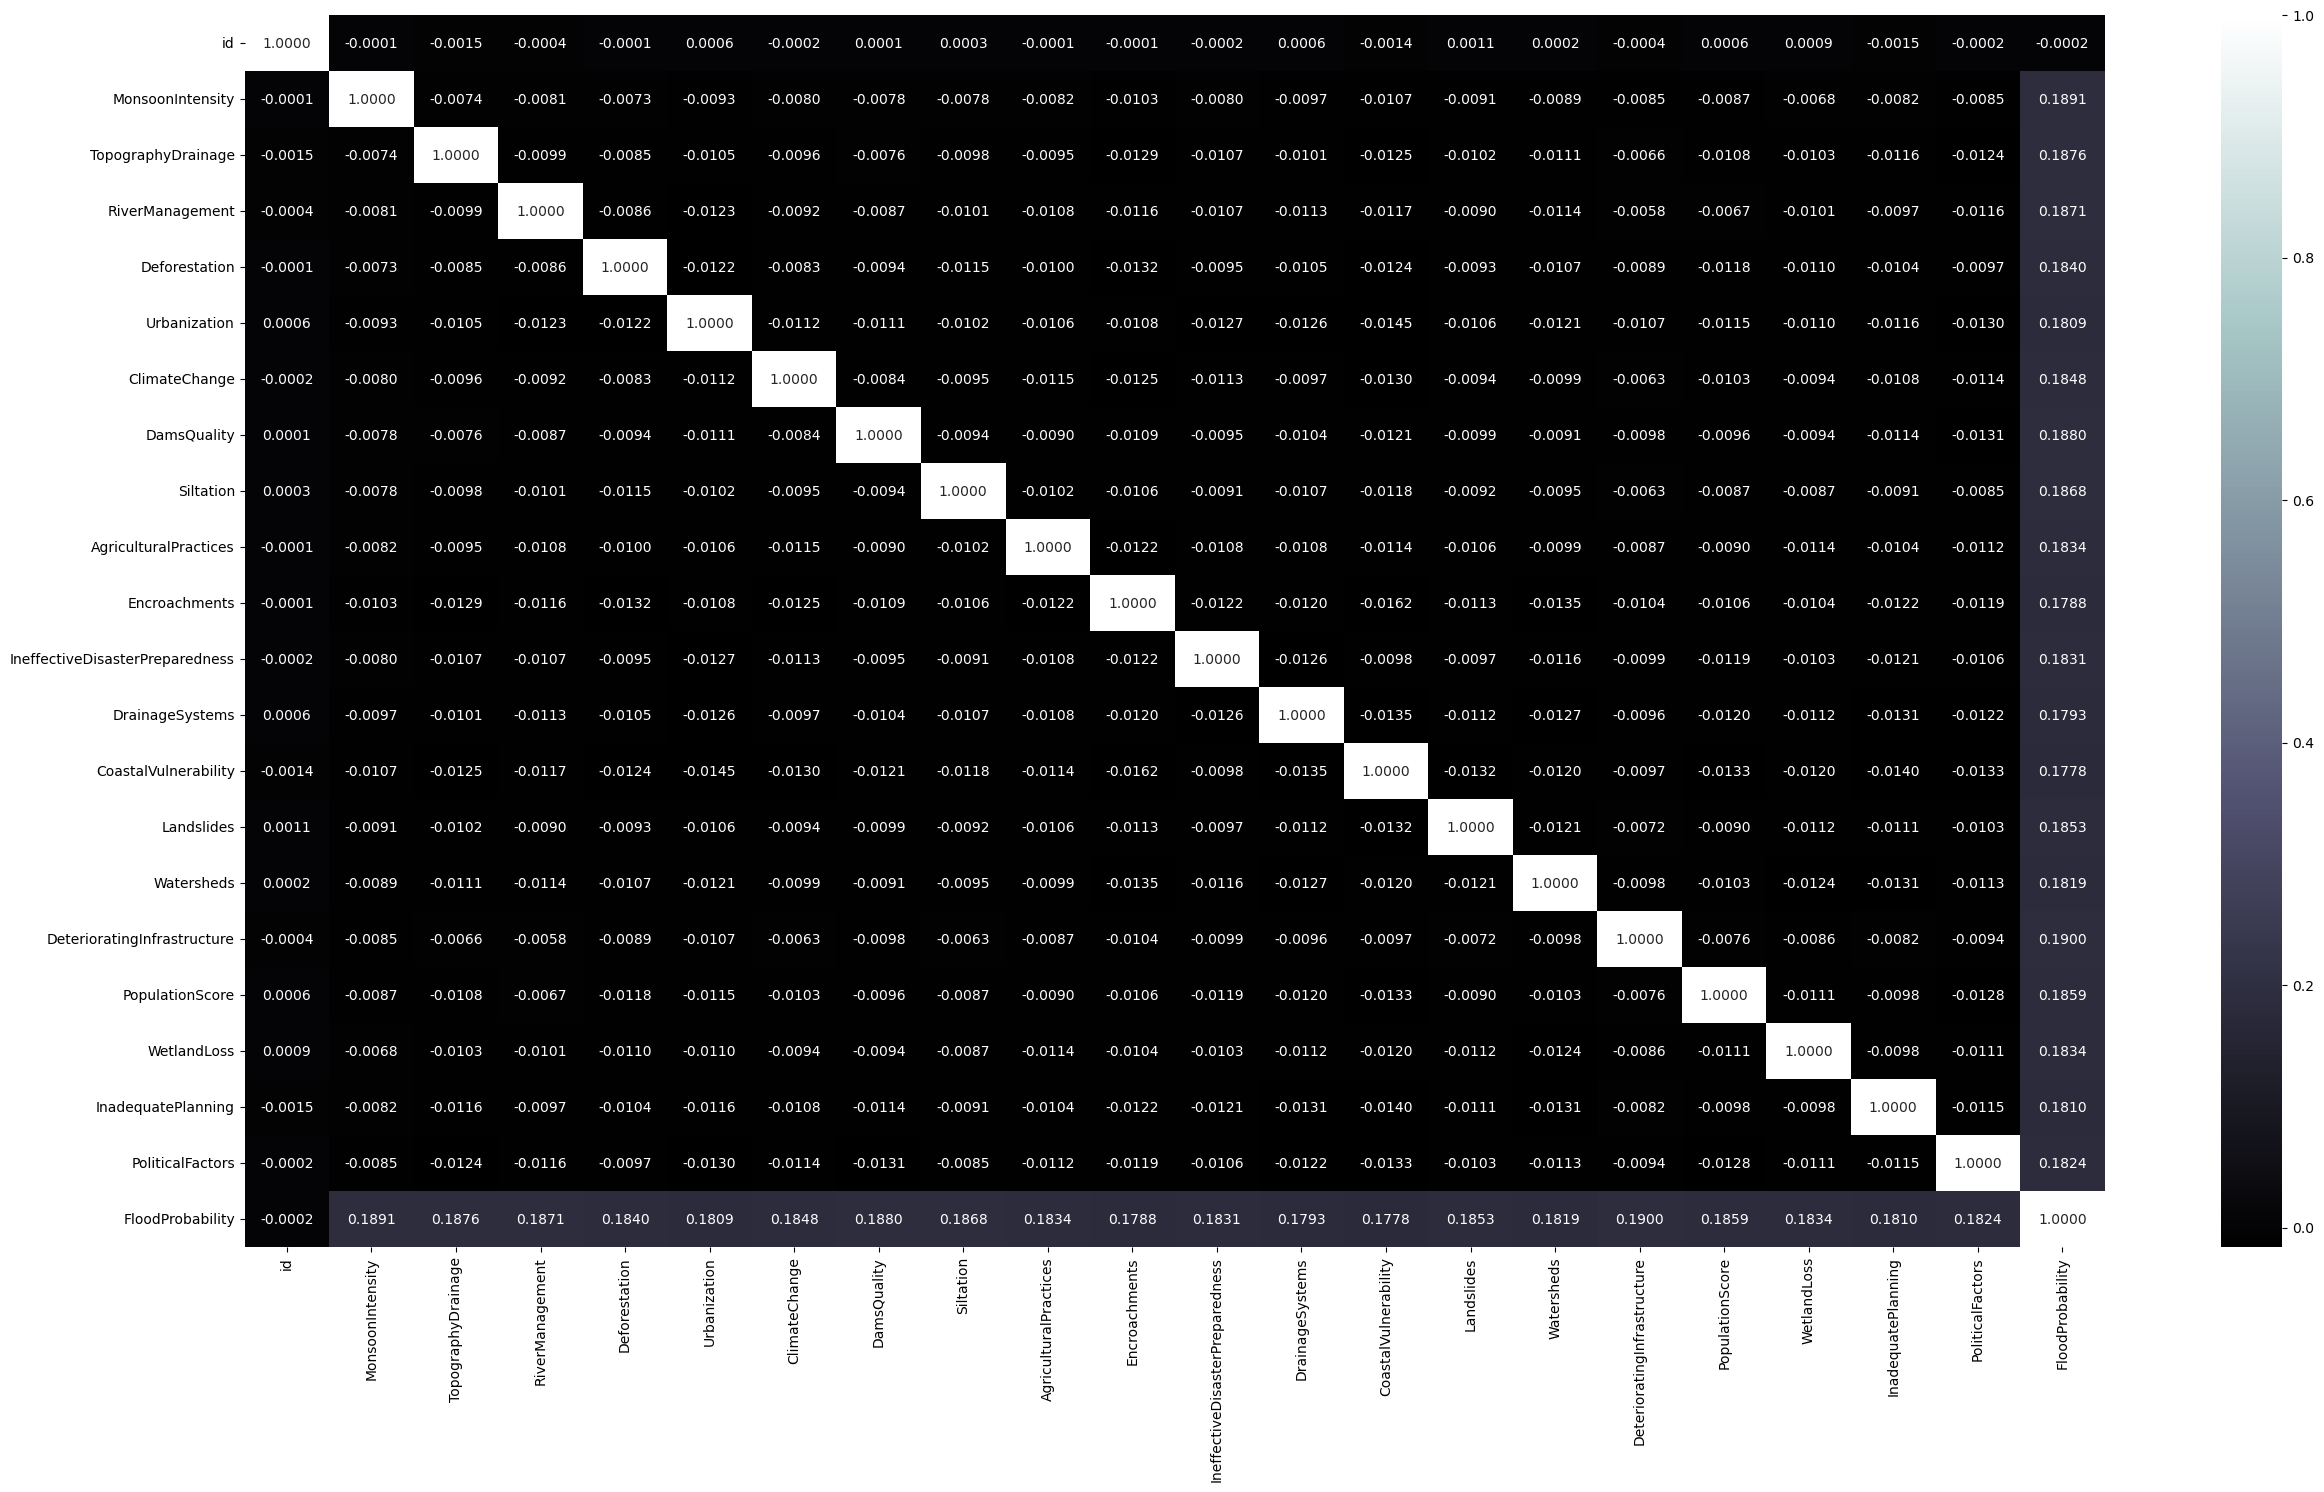

In [18]:
# A plot to view the correlation between the features of the dataframe new_ndf
plt.figure(figsize=(30,16))
sns.heatmap(df_train.corr(),annot=True,cmap="bone",fmt='.4f')

___

## Data Preprocessing and Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

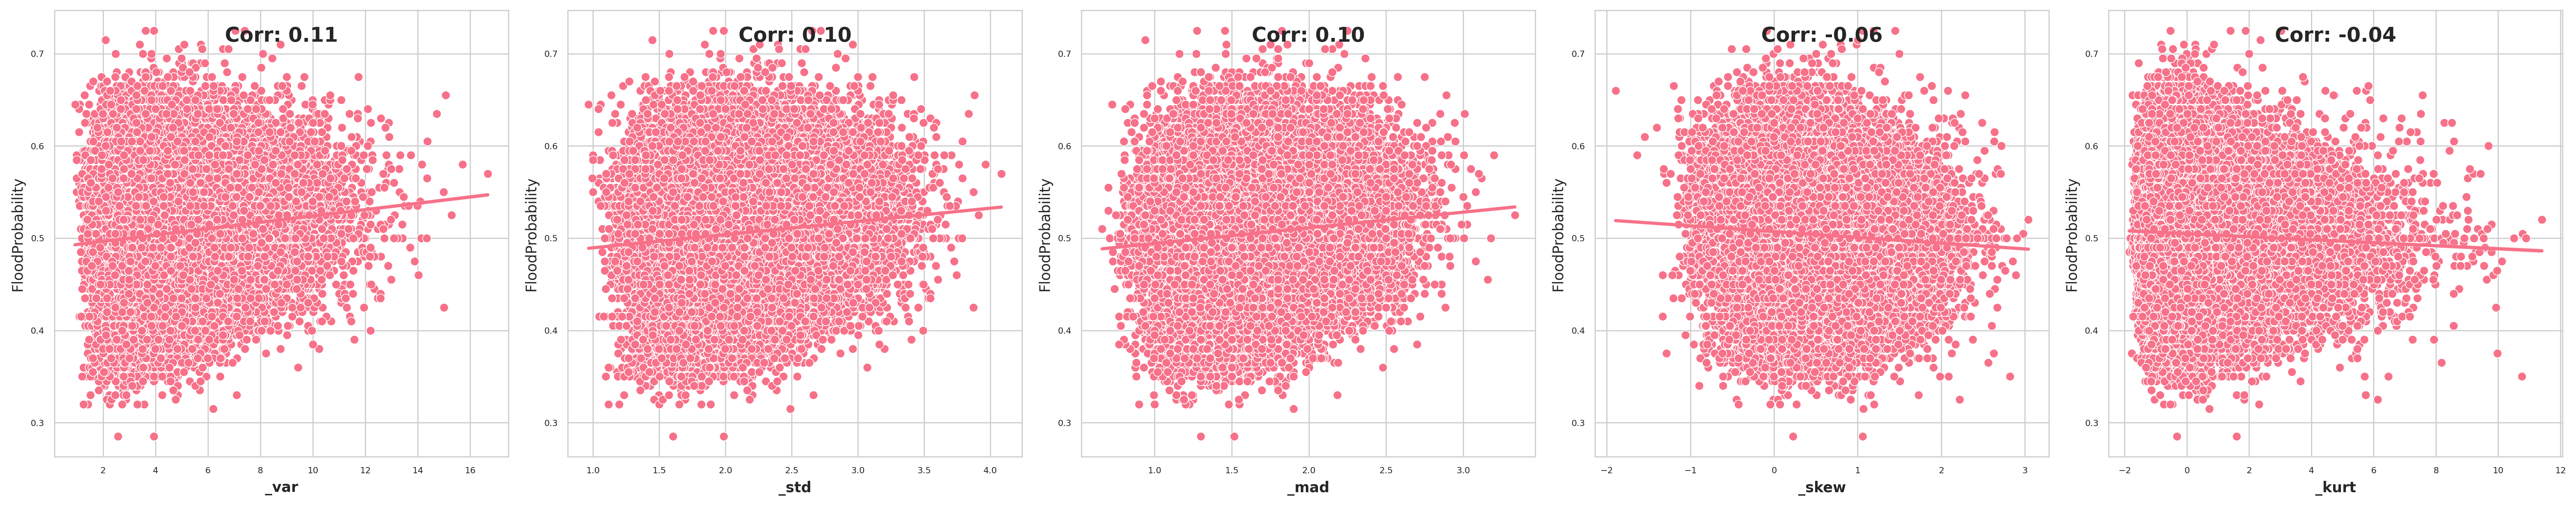
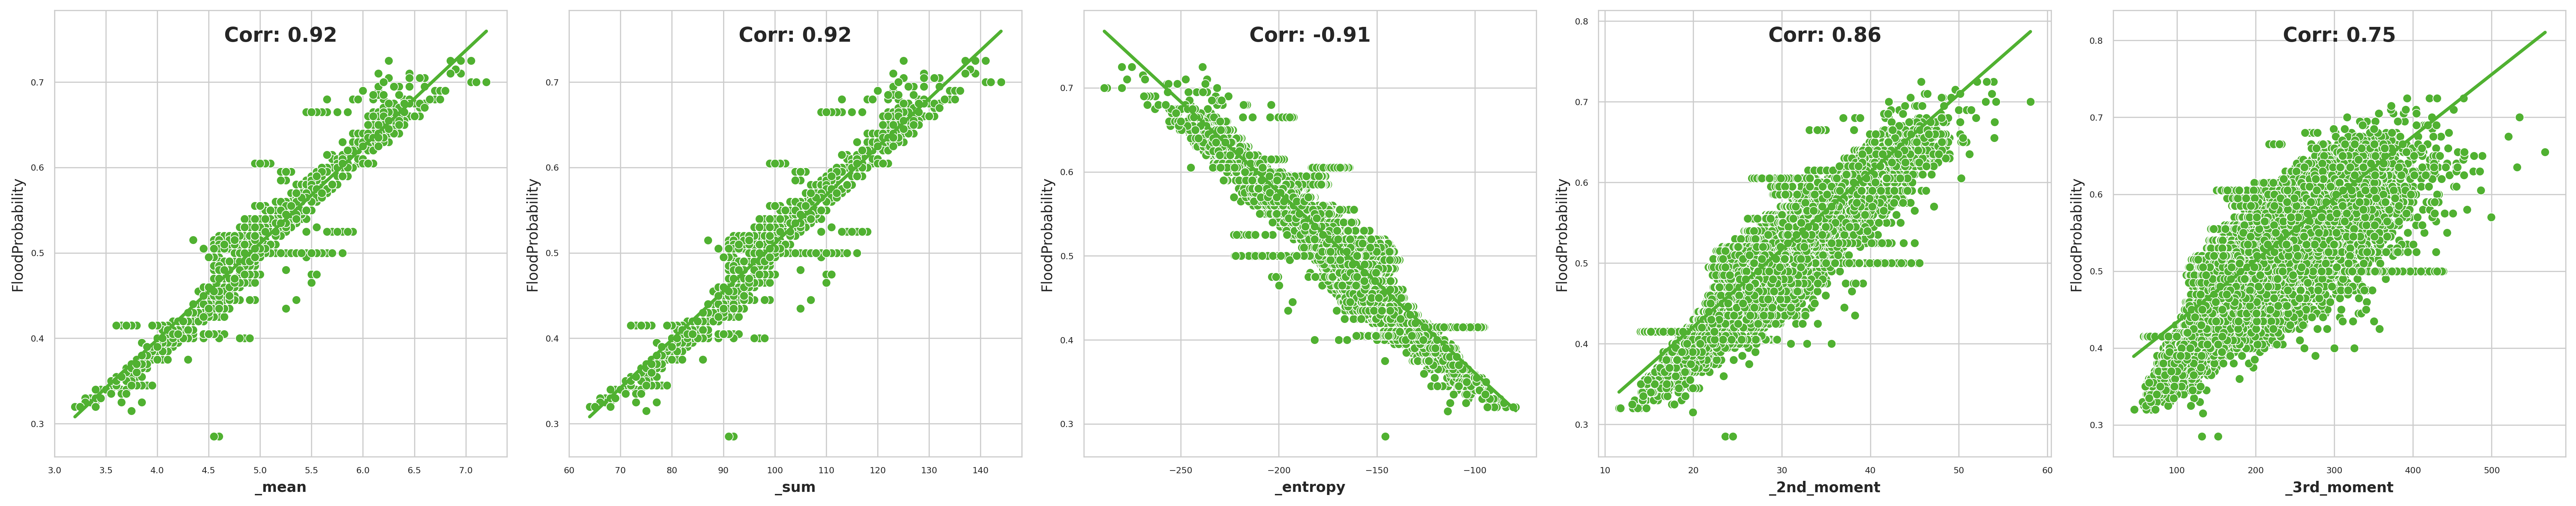

```
I guess skew, var, std, and kurtosis turned out to be useful features after all. Well… they have always been helpful for score improvement, as we have observed, but at least now I know why.
```
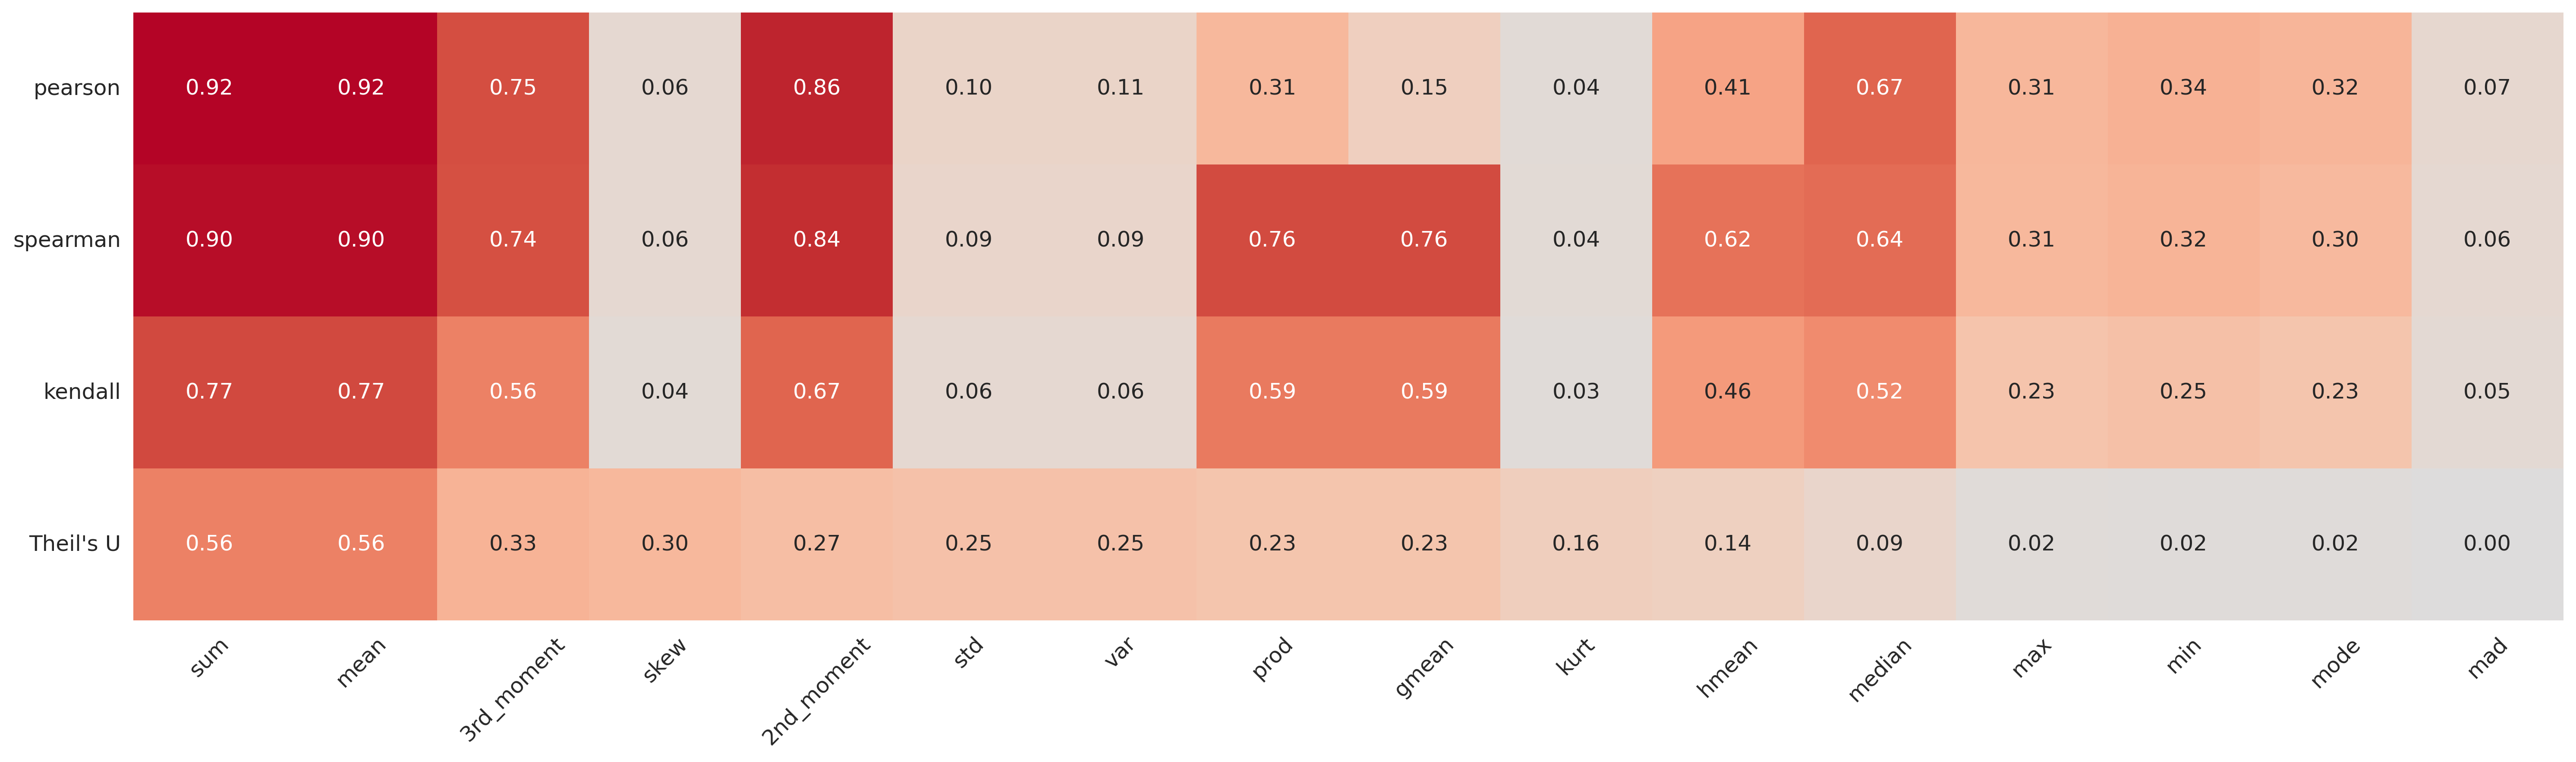

In [10]:
def feature_engineering(df, features):
    scaler = StandardScaler()
    
    # Basic statistical features
    df['fsum'] = df[features].sum(axis=1) 
    df['fmean'] = 0.1 * df[features].mean(axis=1)
    df['fmed'] = 0.1 * df[features].median(axis=1)

    df['fstd'] = df[features].std(axis=1)
    df['prod'] = df[features].prod(axis=1)
    df['fmin'] = df[features].max(axis=1)
    df['fmax'] = df[features].min(axis=1)
    df['fvar'] = df[features].var(axis=1)
    df['fskew'] = df[features].skew(axis=1)
    df['fkurtosis'] = df[features].kurtosis(axis=1)

    df['quant25'] = df[features].quantile(0.25, axis=1)
    df['quant75'] = df[features].quantile(0.75, axis=1)
    df['range'] = df[features].max(axis=1) - df[features].min(axis=1)

    # df['coefficient_of_variation'] = df[features].std(axis=1) / df[features].mean(axis=1)
    df['quantile_range'] = df[features].quantile(0.75, axis=1) - df[features].quantile(0.25, axis=1)
    
    # Standard scaling
    df[features] = scaler.fit_transform(df[features])
    
    return df

In [11]:
TARGET = "FloodProbability"
FEATURES = [f for f in df_train.columns if f not in ["id", TARGET]]
ENG_FEATURES = ["fsum", "fmean", "fmed", "fstd", "prod", "fmin", "fmax", "fvar", "quant25", "quant75", "range", "quantile_range"]

In [12]:
df_train["is_generated"] = 1
df_test["is_generated"] = 1
df_original["is_generated"] = 0

In [13]:
train, test, original = [feature_engineering(df, FEATURES) for df in [df_train, df_test, df_original]]

In [29]:
train.shape

(1117957, 37)

In [17]:
train

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0              0          0.038198            1.467769         0.021561   
1              1          0.524488            0.990186        -0.461022   
2              2          0.524488            0.035021         0.504143   
3              3         -0.934382           -0.442562         0.504143   
4              4          0.038198           -0.920145        -1.426186   
...          ...               ...                 ...              ...   
1117952  1117952         -0.934382           -0.920145        -0.461022   
1117953  1117953         -1.420672           -1.397727        -0.461022   
1117954  1117954          1.010778           -0.920145         1.951890   
1117955  1117955          1.010778           -0.920145        -0.943604   
1117956  1117956         -0.448092            0.035021         0.504143   

         Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0             1.490363      0.507578      -0.453941    -0.458881  -0.933107   
1            -0.459251      1.467552       1.489938    -0.938943   0.034951   
2             1.002959     -0.932383       1.003968    -1.899068   0.034951   
3             0.028152     -0.452396       1.489938    -0.458881   1.003010   
4             0.515556     -0.452396      -0.453941    -0.938943  -0.933107   
...                ...           ...            ...          ...        ...   
1117952       2.465169     -0.452396       0.032029     0.021182   1.003010   
1117953      -0.946654      1.947539       0.032029     1.461369  -1.901166   
1117954      -0.459251      0.507578       0.032029     1.941432  -1.901166   
1117955       1.002959      0.027591      -1.425881    -0.938943  -0.449078   
1117956       1.977766      0.027591       0.032029    -1.419006   1.487039   

         AgriculturalPractices  ...            prod  fmin  fmax      fvar  \
0                    -0.939124  ...   7315660800000     8     2  3.063158   
1                    -0.455692  ...               0     9     0  5.273684   
2                    -0.455692  ...  10081895040000     8     1  3.734211   
3                     0.511171  ...  72831467520000     8     2  2.694737   
4                    -0.939124  ...     20155392000     6     1  2.252632   
...                        ...  ...             ...   ...   ...       ...   
1117952               2.444899  ...   4551966720000    10     1  6.471053   
1117953              -0.939124  ...   2821754880000     9     1  5.852632   
1117954              -0.939124  ...   9185400000000     9     1  3.884211   
1117955               0.511171  ...  22122558259200     8     2  2.892105   
1117956              -0.455692  ...  97542144000000     9     1  4.052632   

            fskew  fkurtosis  quant25  quant75  range  quantile_range  
0        0.577258  -0.521862     3.00     5.25      6            2.25  
1        0.148339  -0.358403     3.00     6.25      9            3.25  
2       -0.408083  -0.742415     3.00     6.25      7            3.25  
3        0.120566  -0.590749     4.00     6.25      6            2.25  
4        0.253227  -0.922261     2.75     5.00      5            2.25  
...           ...        ...      ...      ...    ...             ...  
1117952  0.616174  -0.289320     3.00     7.00      9            4.00  
1117953  0.606652  -0.530161     3.00     5.50      8            2.50  
1117954  0.383184   0.854564     4.00     5.25      8            1.25  
1117955  0.014803  -1.100009     3.75     6.00      6            2.25  
1117956 -0.344064   0.213765     4.75     7.00      8            2.25  

[1117957 rows x 37 columns]

## Split data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train[ENG_FEATURES], 
                                                    train[TARGET],
                                                    test_size = 0.01,
                                                    random_state = 2)

In [20]:
X_train

fsum  fmean  fmed      fstd            prod  fmin  fmax      fvar  \
32258      97  0.485  0.50  1.755443  14511882240000     9     2  3.081579   
546813     99  0.495  0.50  1.637553  17557585920000     8     1  2.681579   
24077      90  0.450  0.50  1.572795   2612736000000     7     2  2.473684   
206044     93  0.465  0.50  2.058998   2133734400000     8     1  4.239474   
372432     89  0.445  0.45  1.637553   1741824000000     8     1  2.681579   
...       ...    ...   ...       ...             ...   ...   ...       ...   
557489     99  0.495  0.50  1.538112  34836480000000     9     3  2.365789   
1102498   103  0.515  0.50  1.694418  56435097600000     9     2  2.871053   
961799     97  0.485  0.45  1.843195  12039487488000     9     2  3.397368   
203245     97  0.485  0.45  2.345769   2633637888000     9     1  5.502632   
100879    105  0.525  0.50  2.124419  32514048000000    10     1  4.513158   

         quant25  quant75  range  quantile_range  
32258       3.75     6.00      7            2.25  
546813      4.00     6.00      7            2.00  
24077       3.75     6.00      5            2.25  
206044      3.00     6.25      7            3.25  
372432      3.75     5.00      7            1.25  
...          ...      ...    ...             ...  
557489      4.00     5.00      6            1.00  
1102498     4.00     6.00      7            2.00  
961799      4.00     6.00      7            2.00  
203245      3.75     6.25      8            2.50  
100879      4.00     6.25      9            2.25  

[1106777 rows x 12 columns]

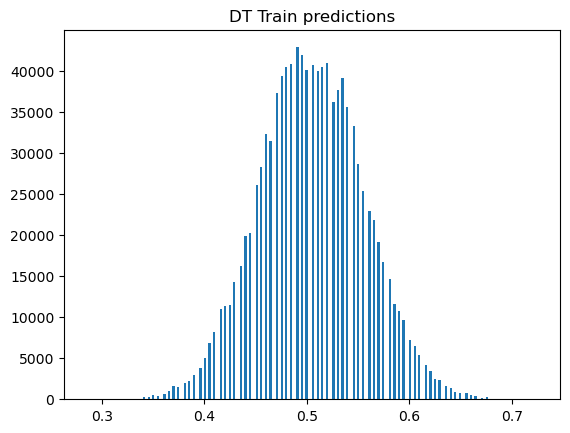

In [21]:
pd.DataFrame(y_train).hist(bins = 200)
plt.grid(False)
plt.title("DT Train predictions")
plt.show()

In [22]:
X_train_o = pd.concat([X_train, original[ENG_FEATURES]]).reset_index(drop = True)
y_train_o = pd.concat([y_train, original[TARGET]]).reset_index(drop = True)

In [23]:
X_train_o.shape

(1156777, 12)

## Train Model

In [24]:
dt_params = {
    'splitter': 'random',
    'min_samples_leaf': 55,
    'random_state': 1,
    'max_depth': 15,
    'ccp_alpha': 1e-10,
    'min_impurity_decrease': 1e-12
}

In [25]:
model = DecisionTreeRegressor(**dt_params)
model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

In [26]:
print(f"R2 CV Score: {round(r2_score(y_test, y_pred), 8)}")

R2 CV Score: 0.87091038


In [145]:
from tqdm import tqdm

100%|██████████| 50/50 [02:30<00:00,  3.02s/it]


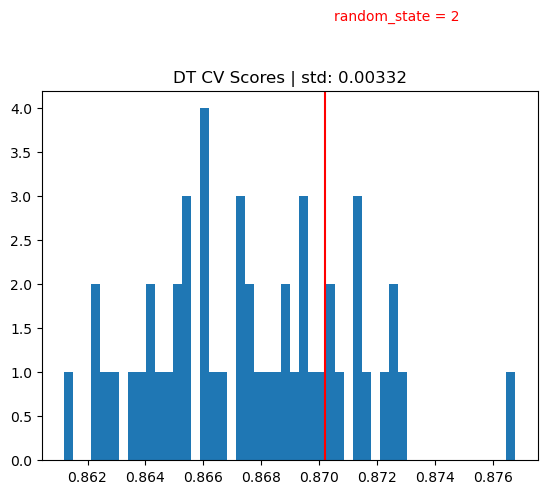

In [146]:
cv_scores = []

for seed in tqdm(range(50)):
    X_train, X_test, y_train, y_test = train_test_split(train[ENG_FEATURES], train[TARGET], test_size = 0.01, random_state = seed)
    X_train_o = pd.concat([X_train, original[ENG_FEATURES]]).reset_index(drop = True)
    y_train_o = pd.concat([y_train, original[TARGET]]).reset_index(drop = True)
    model = DecisionTreeRegressor(**dt_params)
    model.fit(X_train_o, y_train_o)
    y_pred = model.predict(X_test)
    cv_scores.append(round(r2_score(y_test, y_pred), 5))

ax = pd.DataFrame(cv_scores).hist(bins = 50)
plt.grid(False)
plt.title(f"DT CV Scores | std: {round(np.std(cv_scores), 5)}")
plt.axvline(0.87022, c = "red")
plt.text(0.8705, 5, "random_state = 2", c = "red")
plt.show()

## Predict

In [27]:
# Fit model to all of the training data
model = DecisionTreeRegressor(**dt_params)
model.fit(train[ENG_FEATURES], train[TARGET])

DecisionTreeRegressor(ccp_alpha=1e-10, max_depth=15,
                      min_impurity_decrease=1e-12, min_samples_leaf=55,
                      random_state=1, splitter='random')

In [28]:
test_preds = model.predict(test[ENG_FEATURES])

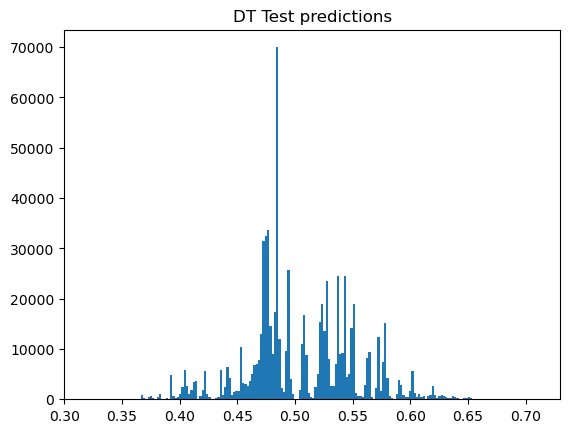

In [142]:
pd.DataFrame(test_preds).hist(bins = 200)
plt.grid(False)
plt.title("DT Test predictions")
plt.show()

In [143]:
df_sub[TARGET] = test_preds
df_sub.to_csv("submission.csv", index=False)

In [144]:
df_sub

id  FloodProbability
0       1117957          0.577744
1       1117958          0.454086
2       1117959          0.446645
3       1117960          0.464633
4       1117961          0.464633
...         ...               ...
745300  1863257          0.468876
745301  1863258          0.441758
745302  1863259          0.619786
745303  1863260          0.547842
745304  1863261          0.528311

[745305 rows x 2 columns]